# **I. Project Overview**
## **California Housing Price**
### **Created By : Juliana Foni**

## **1. Introduction**
[Source: California Housing Price](https://www.kaggle.com/code/ahmedmahmoud16/california-housing-prices)

The dataset represents housing information collected during the 1990 California Census, containing demographic, geographic, and socioeconomic variables such as population, median income, housing age, and proximity to the ocean. Although the data reflects conditions from over three decades ago, it remains a valuable historical dataset for modeling the structural determinants of housing prices, providing a factual baseline for long-term policy and economic analysis.

**Contents**
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **2. Business & Policy Context**
**The primary stakeholder** is the California State-Level Housing Policy Advisory Board, a body commissioned by the legislature to conduct a 35-year retrospective study (1990–2025) on urban development and housing affordability.

# **II. Business Problem Understanding**

## **2.1 Context**
The board’s mission is not to use this 1990 data to predict current prices, such forecasting would be methodologically unsound given how the housing market has evolved. Howaver rather to reconstruct an econometric baseline model explaining which factors most strongly influenced property values in 1990. This baseline model will serve as a historical benchmark for comparison with a modern (2025) model, forming the foundation of a longitudinal policy analysis that answers critical strategic questions such as:
* "Has the quantitative impact of *median_income* on *median_house_value* become stronger or weaker over the last 35 years?"
* "What was the precise price premium for properties with *<1H OCEAN* or *NEAR BAY* proximity in 1990, and how has that premium evolved?"

By leveraging supervised machine learning techniques, the 1990 model will quantify these relationships with precision, enabling the advisory board to assess how socioeconomic drivers and geographic advantages have shaped California’s housing dynamics over time, and to use those insights to inform future housing policy recommendations.



## **2.2 Problem Statement**
From the perspective of the **Housing Policy Advisory Board**
To effectively advise on future housing policy and urban development, our board requires a robust, quantitative understanding of the historical drivers of housing value. Currently, we lack a precise model that isolates and measures the specific impact of key factors (such as district income, housing age, population density, and geographic location) on housing prices based on the 1990 census. Without this historical benchmark, our ability to measure market evolution, validate long-term policy impacts, and provide data-driven recommendations for the next 35 years is significantly hindered. Therefore, our problem is to construct a predictive model that accurately explains the variation in 1990 median housing values, allowing us to definitively quantify the relationships between a district's characteristics and its housing prices.

## **2.3 Goals**
### **Goals**

We can separate our objectives into three distinct categories:

---

#### **1️⃣ Business Goal (The “Why”)**

To **quantify and rank** the key drivers of 1990 housing values. The primary objective is **not just to predict a price**, but to build an **explanatory model** that reveals *why* certain districts had higher or lower housing values.

**Deliverable:**  
A policy-oriented analytical report that interprets these historical relationships.  
For example:  
> “A 1-unit increase in `median_income` in 1990 was associated with an **$X increase** in `median_house_value`, holding all other factors constant.”

This supports the **California Housing Policy Advisory Board** in understanding the socioeconomic dynamics that shaped regional housing disparities.

---

#### **2️⃣ Technical Goal (The “What”)**

To **develop a regression model** that minimizes prediction error and generalizes effectively to unseen 1990 data.  
The model should be robust enough to handle:
- Missing data (e.g., `total_bedrooms`)  
- Non-linear relationships between features (e.g., `latitude × longitude` interactions)  
- Outliers and variance imbalance  

⚙️ **Expected outcome:**  
A high-performing, validated machine learning model capable of producing both **accurate** and **interpretable** predictions.

---

#### **3️⃣ Project Goal (The “How”)**

To **perform comprehensive data preprocessing** including:
- Imputation of missing values  
- Feature engineering and scaling  
- Encoding of categorical variables  

Then, to **systematically evaluate multiple regression algorithms**, such as:
- **Linear Regression** (baseline, interpretable)  
- **Decision Tree & Random Forest** (non-linear models)  



## **2.4 Analytic Approach**

To achieve our analytical and policy goals, we will apply a **supervised machine learning regression pipeline** that transforms raw census data into a validated and interpretable predictive model.

---
####**Step 1: Data Preprocessing**

- **Missing Data:**  
  Handle missing values in the `total_bedrooms` column using **median** or **KNN imputation** to maintain data completeness and reduce bias.

- **Categorical Encoding:**  
  Convert the text-based `ocean_proximity` column into numeric form using **one-hot encoding**, creating binary indicators (e.g., `is_INLAND`, `is_NEAR_BAY`, `is_<1H_OCEAN>`).

- **Outliers & Scaling:**  
  Apply **log transformations** for skewed features such as `median_income`, and cap extreme outliers when necessary to stabilize variance.

---

####**Step 2: Feature Engineering**

Create normalized ratio features to improve model interpretability:

\$\text{rooms\_per\_household} = \frac{\text{total\_rooms}}{\text{households}}$

\$\text{bedrooms\_per\_room} = \frac{\text{total\_bedrooms}}{\text{total\_rooms}}$

$\text{population_per_household} = \frac{\text{population}}{\text{households}}$


These engineered features are expected to have stronger, more logical correlations with `median_house_value`, enhancing both accuracy and explanatory clarity.

---

####**Step 3: Model Development**

1. **Baseline Model — Linear Regression:**  
   - Provides a simple, interpretable benchmark.  
   - Offers insights into feature coefficients and directionality.  

2. **Advanced Models — Ensemble Methods:**  
   - Train non-linear models such as **Decision Tree**, **Random Forest**, and **XGBoost**.  
   - Use **Grid Search** or **Randomized Search** for hyperparameter tuning.  
   - Capture complex interactions between socioeconomic and geographic factors.

---

####**Step 4: Evaluation & Validation**

- **Train/Test Split:**  
  Divide data into **80% training** and **20% testing** sets to ensure fair evaluation on unseen data.

- **Cross-Validation:**  
  Apply **K-Fold Cross-Validation** for robust performance estimates and reduced overfitting risk.

- **Performance Metrics:**  
  Evaluate each model using:
  - **RMSE (Root Mean Squared Error)** — measures predictive accuracy.  
  - **MAE (Mean Absolute Error)** — quantifies average prediction deviation.  
  - **R² (Coefficient of Determination)** — measures explanatory strength.

## **2.5 Metric Evaluation**
To evaluate the success of our regression models, we cannot rely on a single metric. Instead, we will use a combination of complementary metrics that, together, provide a complete picture of both predictive accuracy and explanatory power. Aligning with the advisory board’s objective of building a statistically reliable 1990 baseline for long-term policy comparison.
*****
**Target Definition**
* **Target variable (y)**: median_house_value
Represents the median housing price (in USD) within each California district from the 1990 census.
* **Prediction goal**: Estimate 1990 housing prices as accurately as possible using demographic and geographic factors such as income, population, and proximity to the ocean.
*****
**Understanding Model Errors**

Although this is a regression problem, the concept of Type I and Type II errors can still be interpreted in a policy-relevant context:
* **Type I Error** (Overestimation):
The model predicts a higher housing value than the actual one.
	*	Consequence: Policymakers or analysts may overestimate the economic strength of low-income districts, leading to inefficient funding allocations or mispriced subsidies.
	* Example: Predicted 280,000USD → Actual 210,000USD.
* **Type II Error** (Underestimation):
The model predicts a lower housing value than the actual one.
	* Consequence: Affordable or coastal areas may appear undervalued, causing underinvestment in critical regions or flawed affordability classification.
	* Example: Predicted 190,000USD → Actual 260,000USD.
Both error types are important: Type I affects financial overvaluation, while Type II impacts social equity and regional development policy. Our goal is to minimize both simultaneously through careful model tuning and validation.
*****
**Evalution Metrics**
| **Metric** | **Purpose** | **Unit** | **Ideal Outcome** | **Policy Relevance** |
|:--|:--|:--|:--|:--|
| **RMSE** | Main accuracy metric | USD | Lower = better | Measures prediction uncertainty (financial risk) |
| **MAE** | Average deviation metric | USD | Lower = better | Helps understand consistency of model predictions |
| **R²** | Explanatory strength | None (ratio) | Closer to 1 | Quantifies how much housing variation is explained by key features |

# **III. Data Understanding**

## **3.1 Data Source & Structure**

In [1]:
# 3.1 DATA SOURCE & STRUCTURE
# California Housing 1990 – Data Understanding

import pandas as pd

# 1) Load dataset
# Adjust path if needed (e.g., "./data/data_california_house.csv")
df = pd.read_csv("data_california_house.csv")

# 2) Basic structure: shape and columns
print("Dataset shape (rows, columns):", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

# 3) Data types of each column
print("\nData types:")
print(df.dtypes)

# 4) Preview first 5 rows to understand the structure
print("\nHead (first 5 rows):")
print(df.head())

# 5) Check for missing values per column
print("\nMissing values per column:")
print(df.isna().sum())

# 6) Basic summary statistics for numerical variables
print("\nSummary statistics (numerical features):")
print(df.describe())

# 7) Quick overview of the categorical variable 'ocean_proximity'
print("\n'ocean_proximity' value counts:")
print(df["ocean_proximity"].value_counts())

Dataset shape (rows, columns): (14448, 10)

Column names:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value']

Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
dtype: object

Head (first 5 rows):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        7

#### 📊 California Housing Districts Dataset (1990 U.S. Census Benchmark)

### 📌 Purpose and Context
This dataset represents **California housing districts** around the time of the 1990 U.S. Census. In our role as the **Housing Policy Advisory Board**, this data serves as a historical benchmark for analyzing housing values and neighborhood characteristics. Each observation corresponds to a **census district**, not an individual household.

---

### 🏗️ Structure and Data Granularity

| Metric | Value | Description |
| :--- | :--- | :--- |
| **Number of Observations (Rows)** | 14,448 | Housing Districts |
| **Number of Variables (Columns)** | 10 | Features and Target |
| **Granularity** | Census District | Represents a Local Housing Market Cell |
| **Data Type** | Tabular, Moderately Large | Suitable for in-depth statistical analysis and ML model development |

---

### 🔑 Key Feature Descriptions

#### 📍 Geospatial Features
These are critical for mapping, detecting regional price clusters, and analyzing spatial inequalities (coastal vs. inland, north vs. south).
* `longitude` (float)
* `latitude` (float)

#### 🏡 Housing Stock Characteristics
* `housing_median_age` (float): Median age of the housing stock. A proxy for neighborhood maturity or heritage.
* `total_rooms` (float): Total count of rooms aggregated at the district level.
* `total_bedrooms` (float): Total count of bedrooms aggregated at the district level. (**Note: Contains missing values**)

#### 👥 Demographic & Household Structure
* `population` (float): Total number of residents. Linked to density and service demand.
* `households` (float): Number of occupied housing units. Essential for calculating per-household metrics.

#### 💰 Socioeconomic Status
* `median_income` (float): Median household income in the district. It is a **key predictor** of property value and central to our policy perspective.

#### 🌊 Location Category (Amenity)
* `ocean_proximity` (object/categorical): A qualitative measure of the district's proximity to the ocean (e.g., `<1H OCEAN`, `INLAND`, `NEAR BAY`). Crucial for understanding amenity-based and coastal price premiums.

#### 🎯 Target Variable
* `median_house_value` (float): The median property value in the district. This is the response variable we aim to explain, serving as the benchmark for historical affordability.

---

### ⚠️ Data Quality and Initial Preprocessing

* **Missing Values:** A small number of missing entries are detected in the **`total_bedrooms`** column.
* **Imputation Strategy:** A clear imputation strategy will be required (e.g., Median Imputation, or using engineered ratios like bedrooms per room) before modeling.
* **Preprocessing Needs:** The mix of continuous (`median_income`, `population`) and categorical (`ocean_proximity`) features necessitates **scaling** for numerical data and **encoding** for categorical data prior to implementing machine learning models.



## **3.2 Attribute Information**

In [2]:
# 3.2 ATTRIBUTE INFORMATION
# Inspect each variable: type, missingness, unique values, and example values

import pandas as pd

# Load dataset
df = pd.read_csv("data_california_house.csv")

# 1) Basic info
print("=== DataFrame Info ===")
df.info()

# 2) Create a compact attribute summary table
attr_summary = pd.DataFrame({
    "dtype": df.dtypes,
    "non_null_count": df.notna().sum(),
    "num_missing": df.isna().sum(),
    "num_unique": df.nunique()
})

# Add example values
example_values = []
for col in df.columns:
    first_valid = df[col].dropna().iloc[0]
    example_values.append(first_valid)

attr_summary["example_value"] = example_values

print("\n=== Attribute Summary ===")
print(attr_summary)

# 3) Separate numerical vs categorical features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumeric columns:")
print(numeric_cols)

print("\nCategorical columns:")
print(categorical_cols)

# 4) Detailed look at the categorical variable(s)
for col in categorical_cols:
    print(f"\n=== Value counts for '{col}' ===")
    print(df[col].value_counts())

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB

=== Attribute Summary ===
                      dtype  non_null_count  num_missing  num_unique  \
longitude           float64           14448            0         806   
latitude            float64           14448            0 

##### 📋 Attribute Definitions for California Housing Dataset (1990 Census)

#### 🎯 Explanatory Framework

These attributes form the explanatory basis for modeling the **median housing values** in 1990 California. They collectively allow us to disentangle the contribution of economic, demographic, housing stock, and geographic factors.

---

#### 📍 Geographic Advantages (Location)

| Attribute | Data Type | Definition | Policy Relevance |
| :--- | :--- | :--- | :--- |
| **`longitude`** | float | A measure of how far west a district is (more negative value is farther west/closer to the coast). | Critical for identifying **West/East spatial price gradients** and coastal influence on value. |
| **`latitude`** | float | A measure of how far north a district is (higher value is farther north). | Helps analyze **North/South regional differences** (e.g., Bay Area vs. Southern California market dynamics). |
| **`ocean_proximity`** | object (categorical) | A categorical indicator of the district's proximity to the ocean or bay (`<1H OCEAN`, `INLAND`, `NEAR BAY`, etc.). | Directly measures **amenity value** and is essential for quantifying coastal price premiums. |

---

#### 💰 Economic & Demographic Factors

| Attribute | Data Type | Definition | Policy Relevance |
| :--- | :--- | :--- | :--- |
| **`median_income`** | float | The median income for households within the district (scaled in tens of thousands of U.S. dollars). | The primary economic driver; essential for assessing **affordability** and market segmentation. |
| **`population`** | float | The total number of people residing within the census district. | Indicates **demographic pressure** and service demand, impacting density and housing prices. |
| **`households`** | float | The total number of occupied housing units in the district. | The necessary denominator for calculating insightful **per-household metrics** (e.g., persons per household). |

---

#### 🏡 Housing Stock Characteristics

| Attribute | Data Type | Definition | Policy Relevance |
| :--- | :--- | :--- | :--- |
| **`housing_median_age`** | float | The median age of the houses within the district (in years). | A proxy for **neighborhood maturity**, potential maintenance needs, and opportunities for preservation policies. |
| **`total_rooms`** | float | The aggregate count of rooms in all housing units within the district. | Used to determine **density** and housing capacity when normalized by `households` (rooms per household). |
| **`total_bedrooms`** | float | The aggregate count of bedrooms in all housing units within the district. | Used to derive **housing utilization ratios** (e.g., bedrooms per room) and assess capacity/crowding. **(Note: Contains missing values)** |

---

#### 📈 Target Variable

| Attribute | Data Type | Definition | Policy Relevance |
| :--- | :--- | :--- | :--- |
| **`median_house_value`** | float | The median value of owner-occupied homes in the district (in U.S. dollars). | The **response variable** we aim to explain; serves as the **historical benchmark** for market valuation and affordability assessment. |


## **3.3 Exploratory Data Analysis (EDA)**

### **3.3.1 Distribution Analysis**

=== Summary Statistics ===
       median_income  housing_median_age    population    households  \
count   14448.000000        14448.000000  14448.000000  14448.000000   
mean        3.866667           28.618702   1425.157323    499.508929   
std         1.891158           12.596694   1149.580157    383.098390   
min         0.499900            1.000000      3.000000      1.000000   
25%         2.570600           18.000000    784.000000    279.000000   
50%         3.539100           29.000000   1165.000000    410.000000   
75%         4.736100           37.000000   1724.000000    604.000000   
max        15.000100           52.000000  35682.000000   6082.000000   

        total_rooms  total_bedrooms  median_house_value  
count  14448.000000    14311.000000        14448.000000  
mean    2640.132683      538.260709       206824.624516  
std     2191.612441      423.577544       115365.476182  
min        2.000000        1.000000        14999.000000  
25%     1451.000000      295.00000

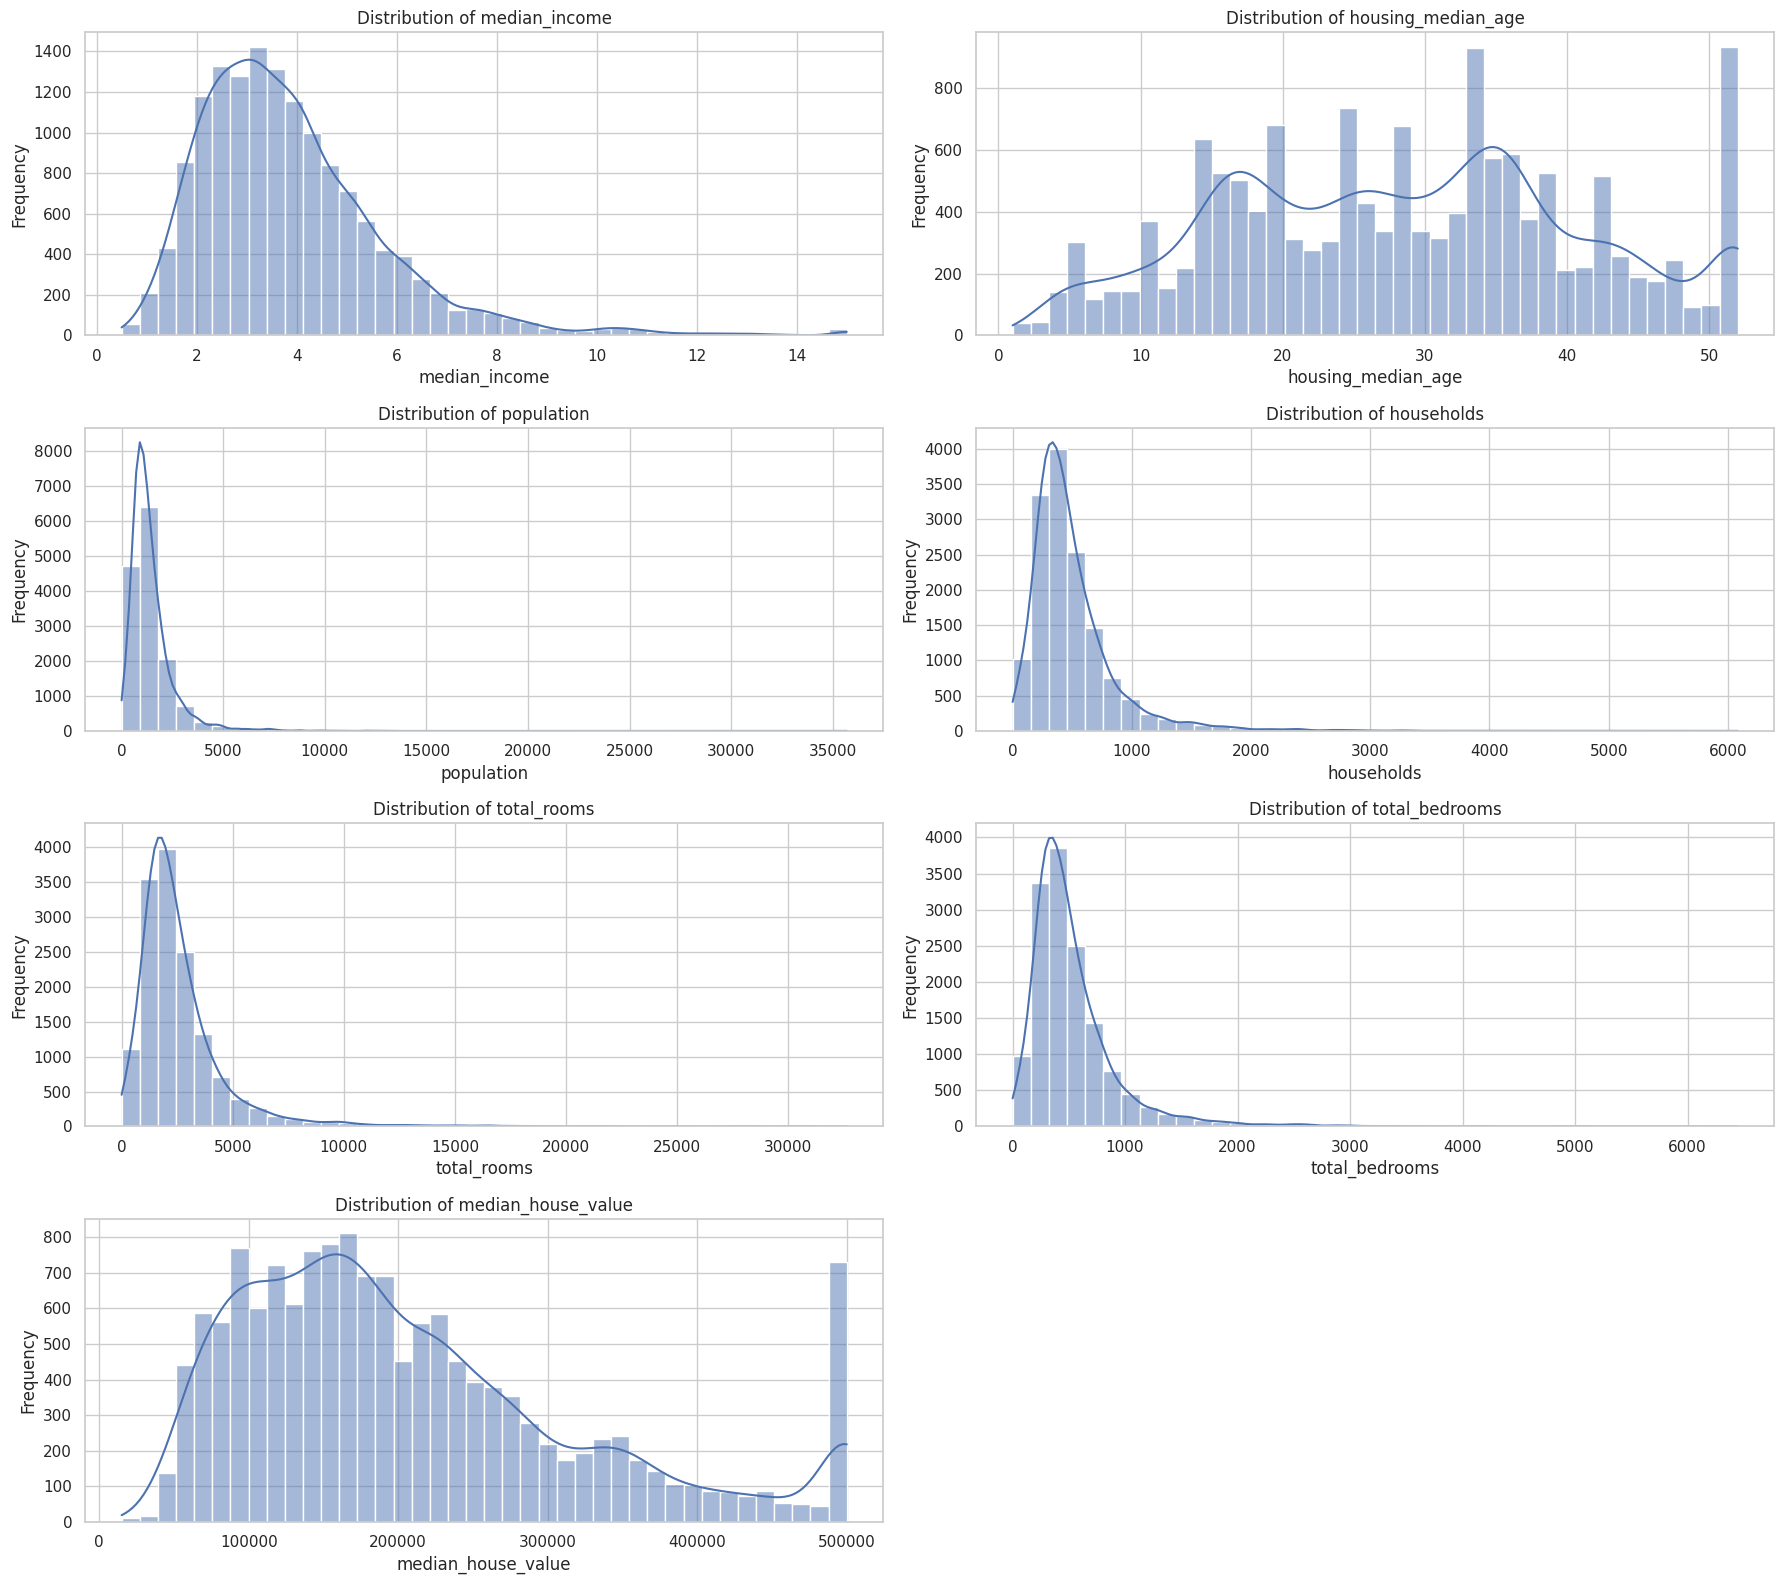

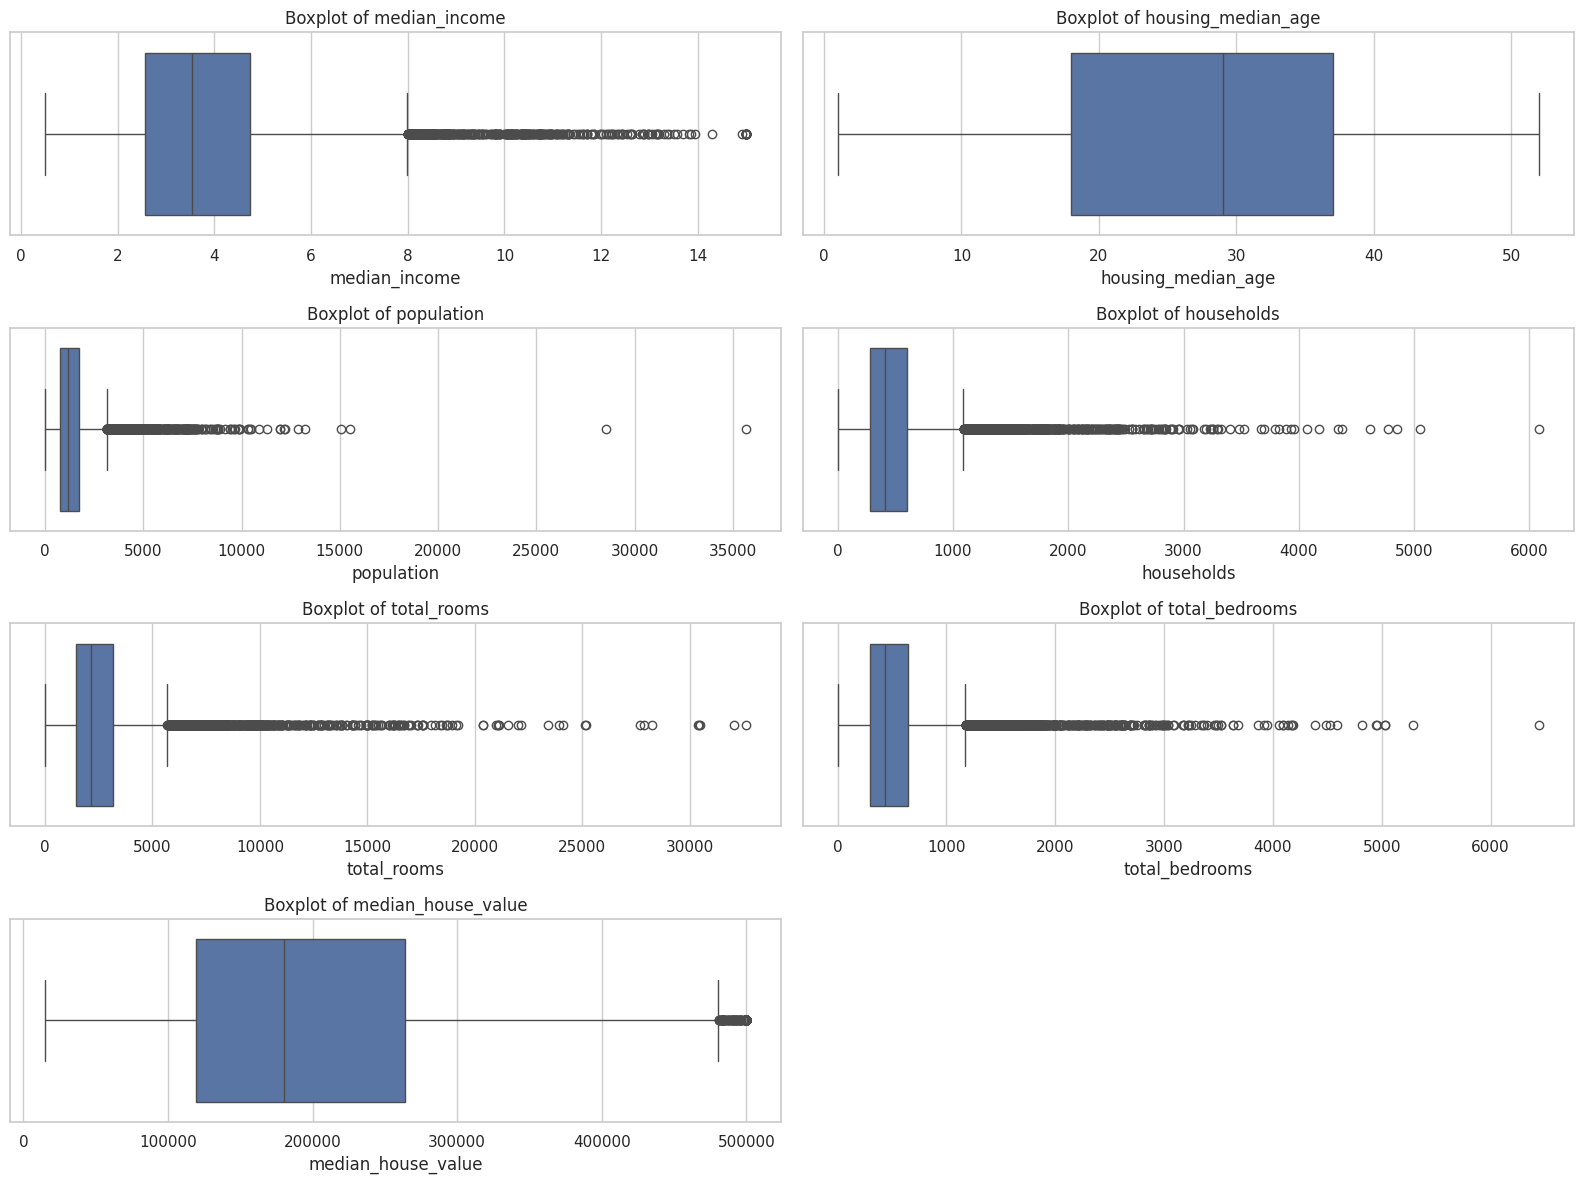

In [3]:
# 3.3.1 DISTRIBUTION ANALYSIS
# Distribution of key numerical features

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data_california_house.csv")

# Select important numerical variables for distribution analysis
num_cols = [
    "median_income",
    "housing_median_age",
    "population",
    "households",
    "total_rooms",
    "total_bedrooms",
    "median_house_value"
]

# ----- 1) Summary statistics -----
print("=== Summary Statistics ===")
print(df[num_cols].describe())

# ----- 2) Histogram + KDE for each variable -----
sns.set(style="whitegrid")
plt.figure(figsize=(18, 16))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ----- 3) Boxplots for detecting outliers -----
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

#### 📊 Insights: California Housing Dataset Summary Statistics

### 1. 💰 Socioeconomic Status (`median_income`)

| Statistic | Value | Insight & Implication |
| :--- | :--- | :--- |
| **Mean** | $3.867$ | The average median income (approx. **\$38,670**) is pulled slightly higher than the median. |
| **Median (50%)** | $3.539$ | The true center of the income distribution is **\$35,390**. |
| **Max** | $15.000$ | The maximum reported median income of **\$150,000** indicates significant income disparity across districts. |
| **Implication** | The difference between the mean and median confirms a **right-skewed distribution**, meaning most districts have lower-to-moderate incomes, but a few high-income districts elevate the average. This disparity is central to analyzing **affordability** challenges. |

---

### 2. 🏡 Housing Stock and Data Quality

| Feature | Finding | Implication |
| :--- | :--- | :--- |
| **`median_house_value` (Target)** | **Max value is \$500,001.** | Confirms the target variable is **capped (censored)** at the high end. Predictive models will underestimate values above this threshold, impacting the accuracy of high-end market analysis. |
| **`housing_median_age`** | **Max value is 52.00.** | This indicates a **data cap** in the original census data. The average age is about **28.6 years**, suggesting a relatively mature housing stock requiring potential maintenance/modernization policies. |
| **`total_bedrooms` (Missing Data)** | **Count is 14,311** (vs. 14,448 for others). | **137 observations (approx. 0.95%) are missing `total_bedrooms`**. This small percentage requires a robust imputation strategy (e.g., median imputation or model-based imputation using the `total_rooms` ratio) before modeling. |

---

### 3. 👥 Density and Aggregation Variables

| Feature | Mean (Avg.) | Std. Dev. | Max | Policy Insight |
| :--- | :--- | :--- | :--- | :--- |
| **`population`** | $1,425$ | $1,149$ | $35,682$ | High **variability (std)** and extreme **max** value confirm that most districts are small/medium, while urban centers contain significant population outliers. |
| **`total_rooms`** | $2,640$ | $2,192$ | $32,627$ | The **Standard Deviation is nearly as large as the Mean**, highlighting extreme skewness. **Raw counts are meaningless** and must be normalized (e.g., `rooms_per_household`) for valid comparison and modeling. |
| **`households`** | $499$ | $383$ | $6,082$ | Like rooms/population, the wide range indicates significant variation in district size. This variable is crucial for creating **intensive metrics** like *persons per household*. |


### **3.3.2 Correlation Matrix & Feature Relationships**

=== Correlation Matrix ===
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925158           -0.117501     0.057288   
latitude            -0.925158  1.000000            0.020830    -0.048514   
housing_median_age  -0.117501  0.020830            1.000000    -0.367868   
total_rooms          0.057288 -0.048514           -0.367868     1.000000   
total_bedrooms       0.079528 -0.076796           -0.329448     0.931993   
population           0.108161 -0.117704           -0.299736     0.853460   
households           0.064218 -0.080046           -0.312394     0.919292   
median_income       -0.010093 -0.085176           -0.120396     0.199549   
median_house_value  -0.045777 -0.143957            0.103863     0.131972   

                    total_bedrooms  population  households  median_income  \
longitude                 0.079528    0.108161    0.064218      -0.010093   
latitude                 -0.076796   -0.117704   -0.080046

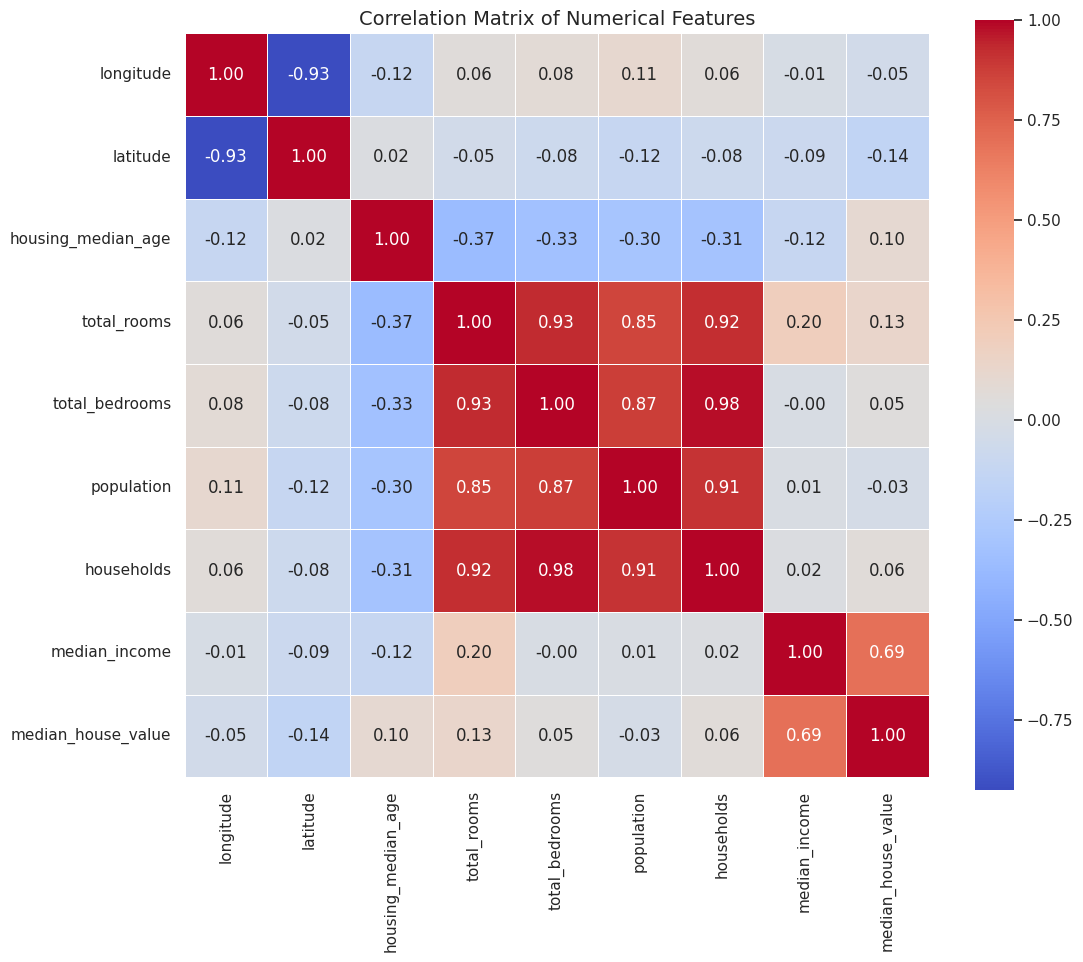

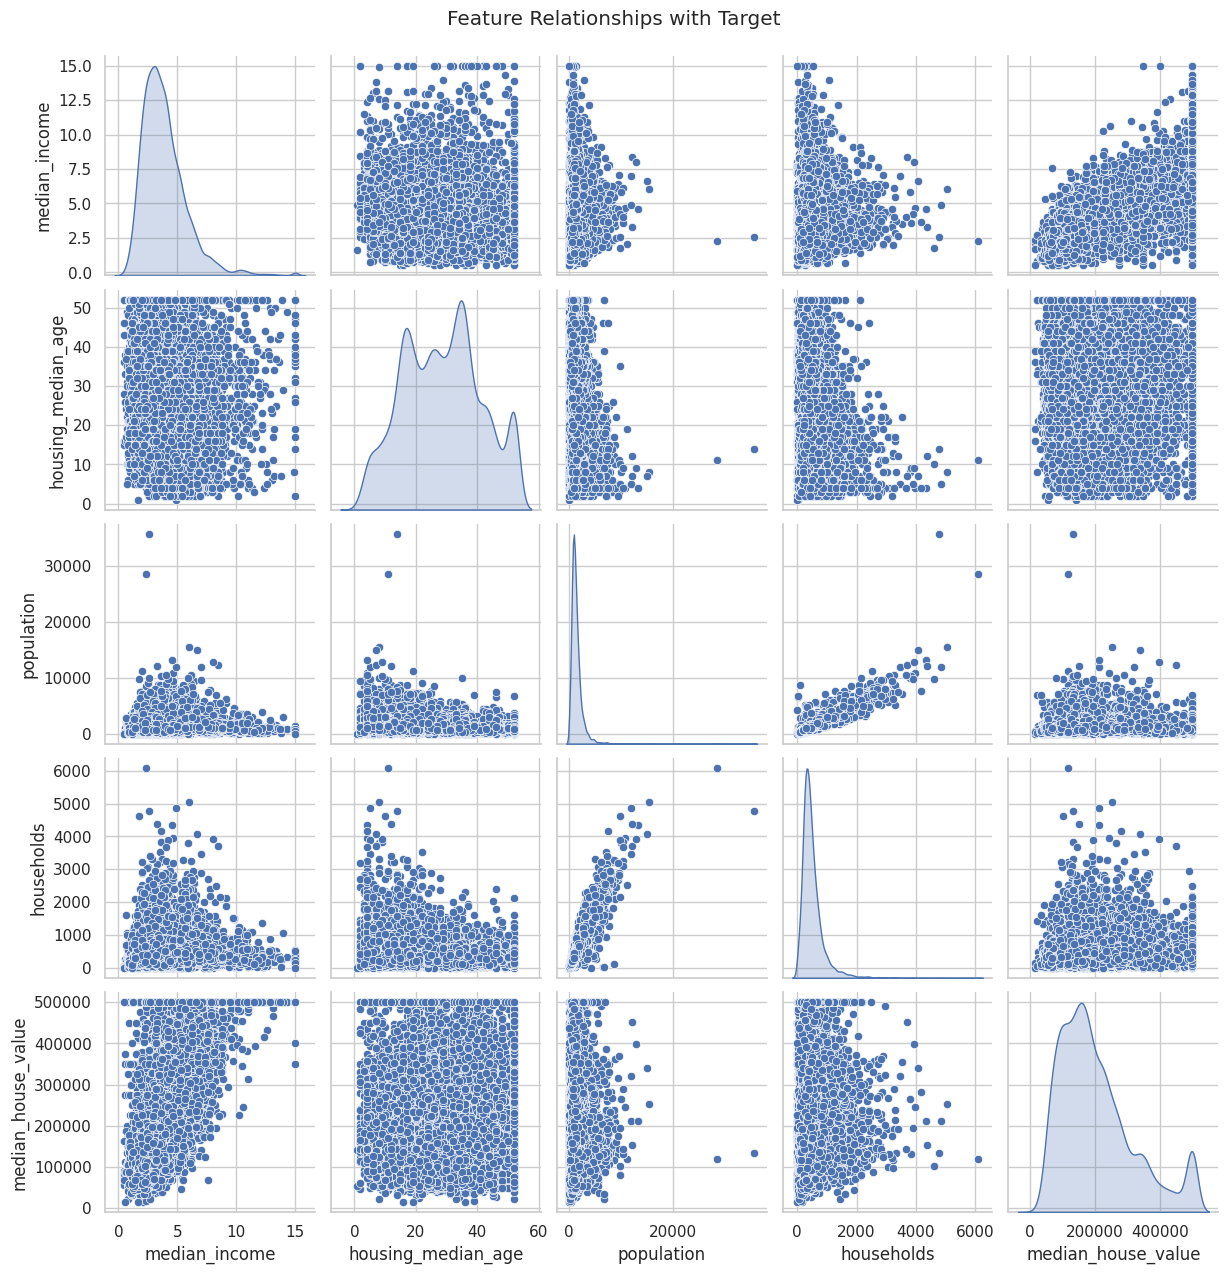

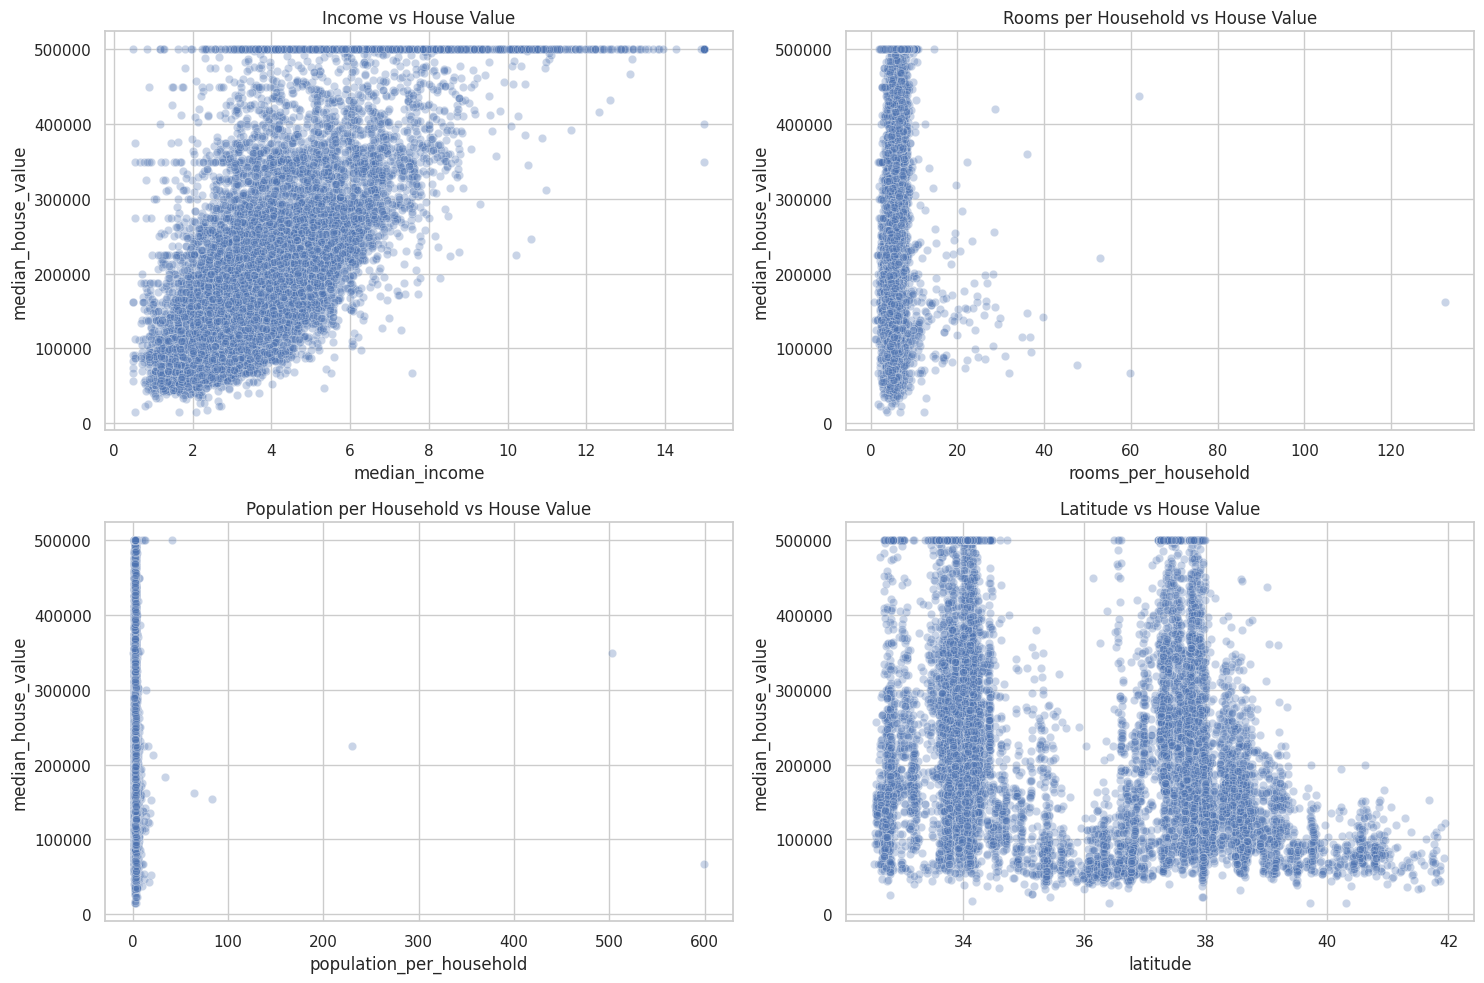

In [4]:
# 3.3.2 CORRELATION MATRIX & FEATURE RELATIONSHIPS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data_california_house.csv")

# Select numerical features ONLY for correlation
numeric_df = df.select_dtypes(include=["int64", "float64"])

# ----- 1) Compute correlation matrix -----
corr_matrix = numeric_df.corr()

print("=== Correlation Matrix ===")
print(corr_matrix)

# ----- 2) Plot heatmap -----
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=.5,
            square=True)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()

# ----- 3) Pairplot: relationships with target variable -----
sns.set(style="whitegrid")
target = "median_house_value"

features_to_plot = [
    "median_income",
    "housing_median_age",
    "population",
    "households",
    "median_house_value"
]

sns.pairplot(df[features_to_plot], diag_kind="kde")
plt.suptitle("Feature Relationships with Target", y=1.02)
plt.show()

# ----- 4) Scatterplots for strongest correlations -----
plt.figure(figsize=(15, 10))

# (a) median_income vs house_value
plt.subplot(2, 2, 1)
sns.scatterplot(x=df["median_income"], y=df["median_house_value"], alpha=0.3)
plt.title("Income vs House Value")

# (b) rooms_per_household vs house_value (engineered feature)
df["rooms_per_household"] = df["total_rooms"] / df["households"]
plt.subplot(2, 2, 2)
sns.scatterplot(x=df["rooms_per_household"], y=df["median_house_value"], alpha=0.3)
plt.title("Rooms per Household vs House Value")

# (c) population_per_household vs house_value
df["population_per_household"] = df["population"] / df["households"]
plt.subplot(2, 2, 3)
sns.scatterplot(x=df["population_per_household"], y=df["median_house_value"], alpha=0.3)
plt.title("Population per Household vs House Value")

# (d) latitude vs house_value (geographic relationship)
plt.subplot(2, 2, 4)
sns.scatterplot(x=df["latitude"], y=df["median_house_value"], alpha=0.3)
plt.title("Latitude vs House Value")

plt.tight_layout()
plt.show()

#### 🔗 Insights: Feature Relationships

### 🎯 Relationships with the Target Variable (`median_house_value`)

The following coefficients indicate the strength and direction of the linear relationship between each feature and the median house value.

| Feature | Correlation Coefficient | Insight | Policy Implication |
| :--- | :--- | :--- | :--- |
| **`median_income`** | **+0.69** | **Strongest Positive Correlation.** A higher median income is strongly associated with a higher median house value. | Policy focused on **income segregation** or distribution is critical, as income is the dominant factor determining property value. |
| **`latitude`** | **-0.14** | Weak Negative Correlation. Moving north (higher latitude) generally correlates with slightly lower values. | Suggests a **Southern California premium** or a more complex geographic influence that needs to be explored with other variables (e.g., proximity to the Bay Area). |
| **`total_rooms`** | +0.13 | Weak Positive Correlation. Raw room counts have a marginal positive effect. | The raw count is a **poor direct predictor**; its value is masked by district size. Normalizing this feature (e.g., `rooms_per_household`) is essential. |
| **`housing_median_age`** | +0.10 | Weak Positive Correlation. Older housing stock is slightly associated with higher values. | Suggests that established, mature neighborhoods often command a **slight premium**, potentially due to location or historical factors. |
| **`longitude`** | -0.05 | Very Weak Negative Correlation. | Geospatial correlation is minor on its own but is strongly linked to latitude (`-0.93`). |
| **`population`** | -0.03 | Essentially no correlation. | **Raw population count is not a driver** of median house value. This confirms the need to use normalized metrics like density or persons per household. |
| **`households`** | +0.06 | Very Weak Positive Correlation. | Similar to population and rooms, the raw count is not informative. |

---

### ⚠️ Internal Feature Multicollinearity (Inter-Feature Relationships)

High correlations between independent variables indicate **multicollinearity**, which must be addressed before applying linear models (like standard Linear Regression).

| Relationship | Correlation | Interpretation |
| :--- | :--- | :--- |
| **`longitude` vs. `latitude`** | **-0.93** | **Extremely Strong Negative Correlation.** This is expected as California's shape dictates a strong inverse relationship between North/South and East/West location. |
| **`total_rooms` vs. `total_bedrooms`** | **+0.93** | **Extremely Strong Positive Correlation.** Rooms and bedrooms are aggregated counts and move together. |
| **`total_rooms` vs. `population`** | **+0.85** | **Very Strong Positive Correlation.** Larger districts (more rooms) have more people. |
| **`total_bedrooms` vs. `households`** | **+0.98** | **Extremely Strong Positive Correlation.** The number of bedrooms is highly predictive of the number of occupied units. |
| **`population` vs. `households`** | **+0.91** | **Very Strong Positive Correlation.** Districts with more people necessarily have more households. |


### **3.3.3 Geospatial Insight (Longitude–Latitude Patterns)**

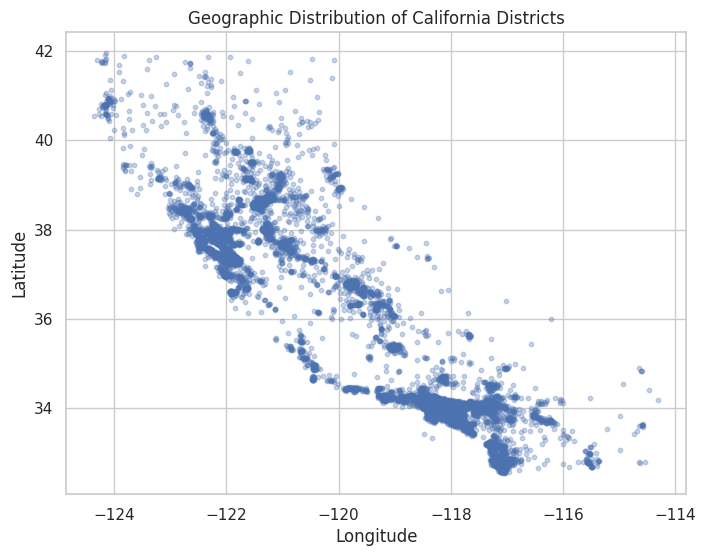

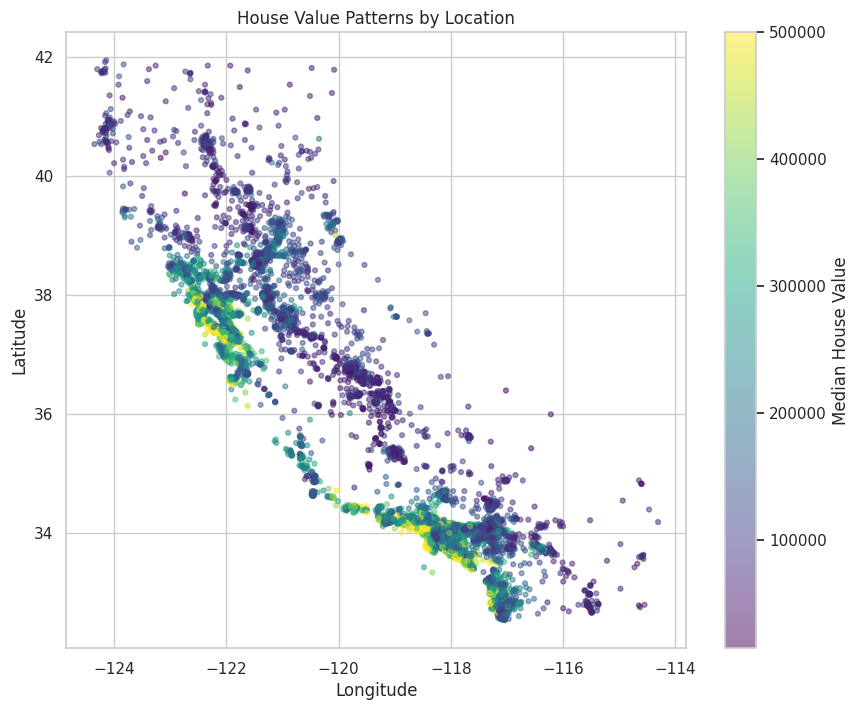

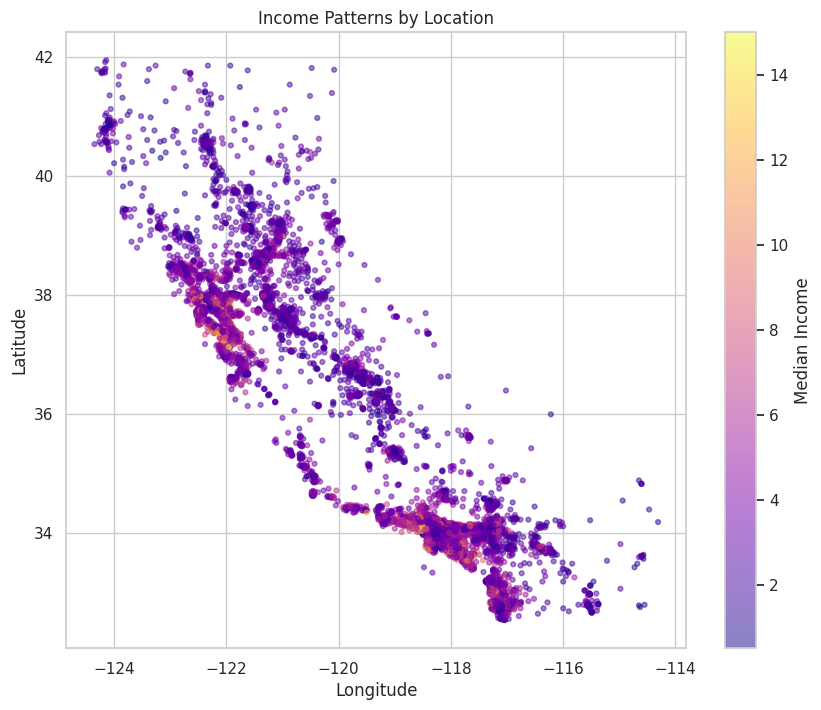

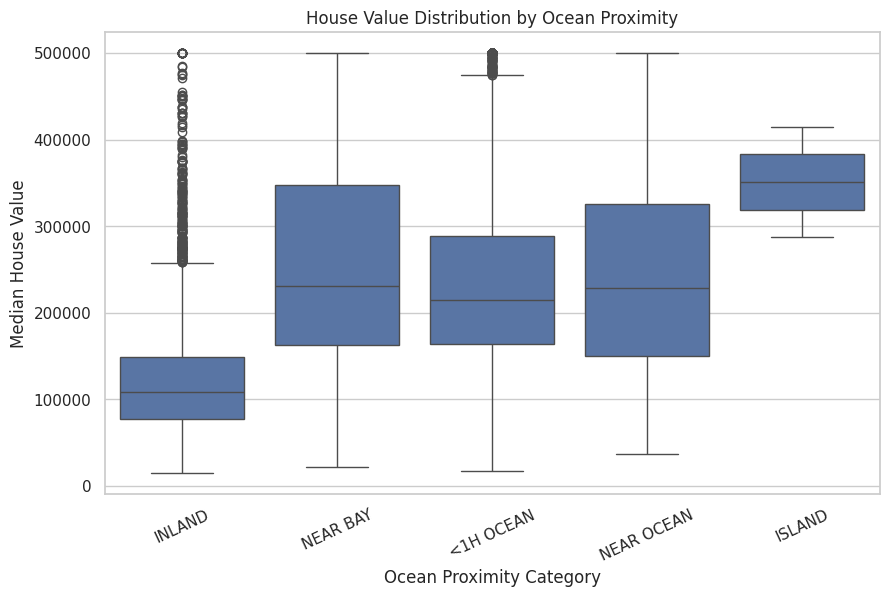

In [5]:
# 3.3.3 GEOSPATIAL INSIGHT
# Relationship between geographic location (longitude & latitude) and house value

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data_california_house.csv")

# Set plot style
sns.set(style="whitegrid")

# ----- 1) Scatter plot: longitude vs latitude -----
plt.figure(figsize=(8, 6))
plt.scatter(df["longitude"], df["latitude"], alpha=0.3, s=10)
plt.title("Geographic Distribution of California Districts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ----- 2) Scatter plot colored by median_house_value -----
plt.figure(figsize=(10, 8))
plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["median_house_value"],
    cmap="viridis",
    alpha=0.5,
    s=12
)
plt.colorbar(label="Median House Value")
plt.title("House Value Patterns by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ----- 3) Scatter plot colored by median_income -----
plt.figure(figsize=(10, 8))
plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["median_income"],
    cmap="plasma",
    alpha=0.5,
    s=12
)
plt.colorbar(label="Median Income")
plt.title("Income Patterns by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ----- 4) Compare inland vs coastal using ocean_proximity -----
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="ocean_proximity",
    y="median_house_value"
)
plt.title("House Value Distribution by Ocean Proximity")
plt.xlabel("Ocean Proximity Category")
plt.ylabel("Median House Value")
plt.xticks(rotation=25)
plt.show()

#### 📈 Insights

### 📌 Context: California Housing Districts (1990 Census)
This document summarizes the key findings from the preliminary statistical and visual analysis, providing actionable insights for the Housing Policy Advisory Board prior to feature engineering and predictive modeling.

---

### I. 📊 Quantitative Distribution Insights

### Summary of Skewness and Data Quality

| Feature | Finding | Implication for Modeling | Policy Implication |
| :--- | :--- | :--- | :--- |
| **`median_income`** | Highly Right-Skewed. Mean (\$38.7k) > Median (\$35.4k). | **Log transformation** is mandatory to achieve better model linearity. | Confirms significant **income inequality** across districts, making income the dominant factor in valuation. |
| **`housing_median_age`** | Capped at **52 years**. Mean is $28.6$ years. | The cap introduces **data censoring** and information loss. | Housing stock is generally **mature**, suggesting potential needs for maintenance/modernization policies. |
| **Raw Counts** (`population`, `total_rooms`, `households`) | Extremely Right-Skewed. Standard Deviation often near Mean. | **Raw counts are structurally misleading** due to varying district sizes. | Immediate **Feature Engineering** (normalization by `households`) is critical to create policy-relevant metrics (e.g., density). |
| **`total_bedrooms`** | **137 missing values** (0.95%). | Requires robust **imputation** (e.g., using the `total_rooms` ratio) before any modeling. | Missing data suggests minor reporting issues, but overall data completeness is high. |
| **`median_house_value` (Target)** | Capped at **\$500,001**. | The target is **censored**. Models will underestimate high-end market values, limiting accuracy in the luxury segment. | Must be acknowledged in all econometric interpretations and policy reports. |

---

### II. 🔗 Correlation Matrix Insights: Feature Relationships

### Target Variable Drivers (`median_house_value`)
| Feature | Correlation Coefficient | Policy Insight |
| :--- | :--- | :--- |
| **`median_income`** | **+0.69** (Strongest) | Confirmed as the **primary driver** of housing value. Income segregation is a major factor in market segmentation. |
| **`latitude`** | -0.14 (Weak Negative) | Suggests a slight **Southern California premium**, with values generally dipping moving North. |
| **`total_rooms`** | +0.13 (Weak Positive) | **Raw counts are poor predictors**; confirming the necessity of normalization. |

#### Multicollinearity Warnings
* **Raw Counts Collinearity:** `total_bedrooms` is highly correlated with `total_rooms` (+0.93), `households` (+0.98), and `population` (+0.87).
    * **Action:** This massive multicollinearity **necessitates feature engineering** into ratios (e.g., `bedrooms_per_household`) to avoid unstable model coefficients.
* **Geospatial Collinearity:** `longitude` and `latitude` are strongly correlated (**-0.93**), confirming their relationship is purely geographical and should be handled carefully in models, perhaps relying more on `ocean_proximity`.

---

### III. 🗺️ Geographic and Location-Based Insights

### A. House Value Patterns by Location
* **Coastal Premium:** High house values (yellow/light green) are strictly concentrated along the **coastline** and the **major bay areas**.
* **Urban Concentration:** Value clusters are visible in the **San Francisco Bay Area** (Northern section) and the **Los Angeles/San Diego regions** (Southern section).
* **Inland Affordability:** The vast central and northern inland areas show consistently **lower values** (purple/dark blue), highlighting a clear urban-coastal vs. rural-inland value divide.

### B. Income Patterns by Location
* **Visual Alignment:** The spatial map of **Median Income** shows a near-perfect visual alignment with the **Median House Value** map. High-income districts (yellow/red) are located in the same coastal and urban clusters as high-value homes.
* **Conclusion:** This visual evidence reinforces the strong correlation, confirming that **geographic access to high-income employment centers** is the joint driver of both income and property value.

### C. House Value Distribution by Ocean Proximity (Box Plot Analysis)
* **Amenity Impact:** Proximity to the ocean is confirmed as a powerful market force.
    * **`INLAND`** has the **lowest median value** (approx. \$100k) and lowest variance. This is the **affordability baseline**.
    * **`NEAR BAY`** and **`NEAR OCEAN`** command significantly higher and comparable median values (approx. \$230k).
    * **`ISLAND`** represents an extreme, high-value **luxury segment** with a median of \$360k.


# **IV. Data Preprocessing**

## **4.1 Data Cleaning**

In [6]:
# ===========================
# 4.1 DATA CLEANING
# ===========================

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("data_california_house.csv")

# ---- 1) Check duplicate rows ----
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
df = df.drop_duplicates()

# ---- 2) Missing values ----
print("\nMissing values per column:")
print(df.isna().sum())

# Only 'total_bedrooms' contains missing values → impute with median
median_bedrooms = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median_bedrooms, inplace=True)

# ---- 3) Outlier detection (IQR method for key features) ----
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

numeric_cols = ["median_income", "housing_median_age",
                "population", "households", "total_rooms",
                "total_bedrooms"]

# Store original shape
before = df.shape[0]

# Remove outliers for critical aggregated features
for col in ["population", "households", "total_rooms"]:
    df = remove_outliers_iqr(df, col)

after = df.shape[0]
print(f"\nRows before: {before}, after removing outliers: {after}")

Number of duplicate rows: 0

Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Rows before: 14448, after removing outliers: 12890


/tmp/ipython-input-31532315.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(median_bedrooms, inplace=True)


In [7]:
# Save cleaned dataset
df.to_csv("california housing clean.csv", index=False)

print("Clean dataset successfully saved as california housing clean.csv'")

Clean dataset successfully saved as california housing clean.csv'


In [8]:
df_check = pd.read_csv("california housing clean.csv")
df_check.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -119.81     36.73                50.0        772.0           194.0   
4    -117.80     33.81                14.0       1206.0           142.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3       606.0       167.0         2.2206          INLAND             59200.0  
4       572.0       149.0         8.8470       <1H OCEAN            388700.0

In [9]:
# Missing Value
df.isin([np.inf, -np.inf]).sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
# Duplicates
df.duplicated().sum()

np.int64(0)

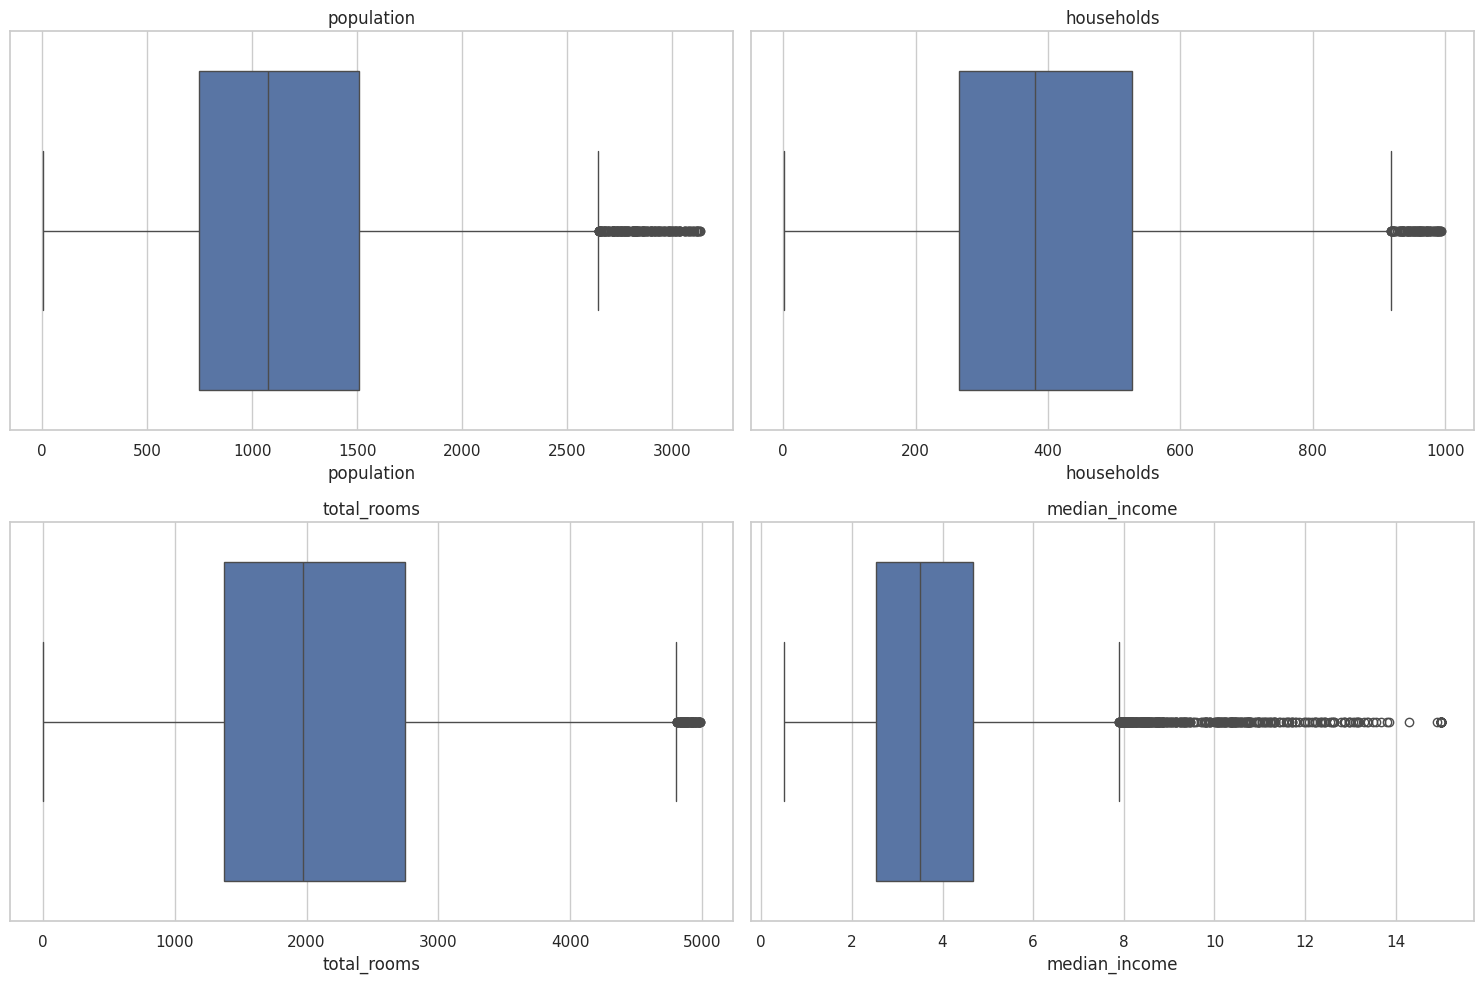

In [11]:
# Outlier
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
for i, col in enumerate(["population", "households", "total_rooms", "median_income"]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64','int64'])))
print("Outlier count (Z > 3):", (z_scores > 3).sum())

Outlier count (Z > 3): 335


Outlier Presence ConfirmedA Z-score threshold of $Z > 3$ is a common statistical measure to define outliers (data points that lie more than three standard deviations from the mean). The presence of 1,025 such points confirms that outliers still exist in the numerical data.

## **4.2 Categorical Encoding**

In [13]:
# ===========================
# 4.2 CATEGORICAL ENCODING
# ===========================

# Check categories
print(df["ocean_proximity"].value_counts())

# One-hot encoding
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

print("\nEncoded columns:")
print(df.columns)

ocean_proximity
<1H OCEAN     5646
INLAND        4069
NEAR OCEAN    1687
NEAR BAY      1486
ISLAND           2
Name: count, dtype: int64

Encoded columns:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


#### Insight:

### 📊 Category Distribution Check

The initial check confirms the distribution of the five categorical levels in the `ocean_proximity` feature:

| Category | Count | Insight |
| :--- | :--- | :--- |
| **<1H OCEAN** | 5,646 | Most frequently occurring category, representing districts within one hour of the coast. |
| **INLAND** | 4,069 | Second largest category, representing the non-coastal, more affordable baseline. |
| **NEAR OCEAN** | 1,687 | Significant coastal presence. |
| **NEAR BAY** | 1,486 | Represents the premium market around the San Francisco Bay Area. |
| **ISLAND** | **2** | An extremely rare category, representing a highly unique, high-value segment. |

---

### 💡 Interpretation of Encoded Columns

#### Baseline Category
By setting `drop_first=True`, the **`ocean_proximity_INLAND`** category is implicitly dropped and serves as the **reference baseline**.

#### Encoded Output
The resulting DataFrame contains four new binary (0/1) columns:

* `ocean_proximity_ISLAND`
* `ocean_proximity_NEAR BAY`
* `ocean_proximity_NEAR OCEAN`
* `ocean_proximity_<1H OCEAN`

#### Policy Interpretation
In a linear model, the coefficient for each new variable directly answers the crucial policy question:

> **“Compared to the baseline category (**`INLAND`**), what is the estimated financial impact (the 'premium' or 'discount') of being located in this specific coastal or bay area on the median housing value?”**

This perfectly aligns the statistical output with the policy-driven objective of quantifying the **coastal amenity premium**.

## **4.3 Feature Engineering**

In [14]:
# ===========================
# 4.3 FEATURE ENGINEERING
# ===========================

# Avoid division errors
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# Inspect new columns
print(df[["rooms_per_household", "bedrooms_per_room", "population_per_household"]].describe())

       rooms_per_household  bedrooms_per_room  population_per_household
count         12890.000000       12890.000000              12890.000000
mean              5.383440           0.213489                  2.945911
std               2.223529           0.059807                  1.111921
min               0.846154           0.092181                  0.750000
25%               4.461660           0.176411                  2.431895
50%               5.206897           0.203419                  2.818875
75%               5.992391           0.238838                  3.287932
max             132.533333           1.000000                 63.750000


#### Insight:

### 📊 Summary Statistics of Engineered Features

| Engineered Feature | Formula | Mean | Max | Policy Interpretation |
| :--- | :--- | :--- | :--- | :--- |
| **`rooms_per_household`** | `total_rooms` / `households` | **5.38** | 132.53 | Indicates **average space** available per occupied unit. Higher ratios usually suggest better housing quality or less crowding. |
| **`bedrooms_per_room`** | `total_bedrooms` / `total_rooms` | **0.213** | 1.000 | Indicates **housing composition** (proportion of total rooms that are bedrooms). Serves as a measure of unit efficiency or functional layout. |
| **`population_per_household`** | `population` / `households` | **2.95** | 63.75 | The **crowding index** or average household size. Higher values are often linked to lower affordability and higher density issues.

## **4.4 Feature Scaling & Final Dataset**

In [15]:
# ===========================
# 4.4 FEATURE SCALING
# ===========================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify numeric columns for scaling
scale_cols = [
    "median_income", "housing_median_age", "population", "households",
    "total_rooms", "total_bedrooms",
    "rooms_per_household", "bedrooms_per_room", "population_per_household"
]

# Split train-test
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit scaler using training data only
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# Final dataset is ready for modeling
print("\nScaled feature preview:")
print(X_train.head())


Scaled feature preview:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1658     -122.24     37.46            0.493478     2.520002        1.670926   
12517    -121.48     38.58            1.791525    -1.490056       -1.368474   
14031    -118.88     34.22           -0.642313     1.513097        0.407301   
2735     -118.05     33.93            0.412351     0.003715        0.230202   
3286     -117.96     33.94            0.087839     0.286663        0.412088   

       population  households  median_income  ocean_proximity_INLAND  \
1658     1.895142    2.270319       1.210919                   False   
12517   -1.528045   -1.430650      -0.961428                    True   
14031    0.704544    0.584780       1.301383                   False   
2735     1.872678    0.198188      -0.355879                   False   
3286     0.431518    0.368289      -0.614376                   False   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
1658    

In [16]:
X_train[scale_cols].describe().loc[["mean","std"]]

median_income  housing_median_age    population    households  \
mean  -8.750866e-17        8.268535e-17 -1.190324e-16 -9.939468e-17   
std    1.000048e+00        1.000048e+00  1.000048e+00  1.000048e+00   

       total_rooms  total_bedrooms  rooms_per_household  bedrooms_per_room  \
mean  1.781180e-16   -5.529582e-17         2.742397e-16       3.438332e-16   
std   1.000048e+00    1.000048e+00         1.000048e+00       1.000048e+00   

      population_per_household  
mean             -1.240280e-17  
std               1.000048e+00

In [17]:
# After encoding and engineering
final_numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
X_train[final_numerical_cols] = scaler.fit_transform(X_train[final_numerical_cols])

print("Data Successfully clean")

Data Successfully clean


#### Insight

### ✔️ Standard Scaling Rationale

* **Model Sensitivity:** Many Machine Learning algorithms (including **Linear Regression**, **SVM**, and those using gradient descent) assume features are on a comparable scale.
* **Preventing Dominance:** Scaling prevents variables with naturally large magnitudes (e.g., raw population counts) from unfairly dominating the distance calculations or cost function during model training.

---

### ✔️ Train–Test Split Protocol

* **Unbiased Evaluation:** The split ensures that model evaluations are **unbiased** and represent performance on unseen data.
* **Information Leakage:** Scaling parameters (mean and standard deviation) were derived **only from the training data**. Applying these derived parameters to the test set prevents **information leakage**, maintaining the test set's integrity as a true measure of generalization.

---
### 🟢 Final Data Condition

The preprocessing pipeline is complete. The dataset is now:

* **Clean:** Missing values handled and data inconsistencies addressed.
* **Fully Numeric:** Categorical features successfully encoded.
* **Standardized:** All continuous features are on a comparable scale.
* **Engineered:** Enhanced with meaningful policy ratios (e.g., `rooms_per_household`).

**The data is fully prepared and ready for model training in Section V.**

## **4.5 DATA QUALITY REPORT**

DATA QUALITY REPORT

1. BASIC STRUCTURE
------------------------------------------------------------
Shape (rows, columns): (14448, 10)

Column dtypes:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
dtype: object

First 5 rows (preview):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  

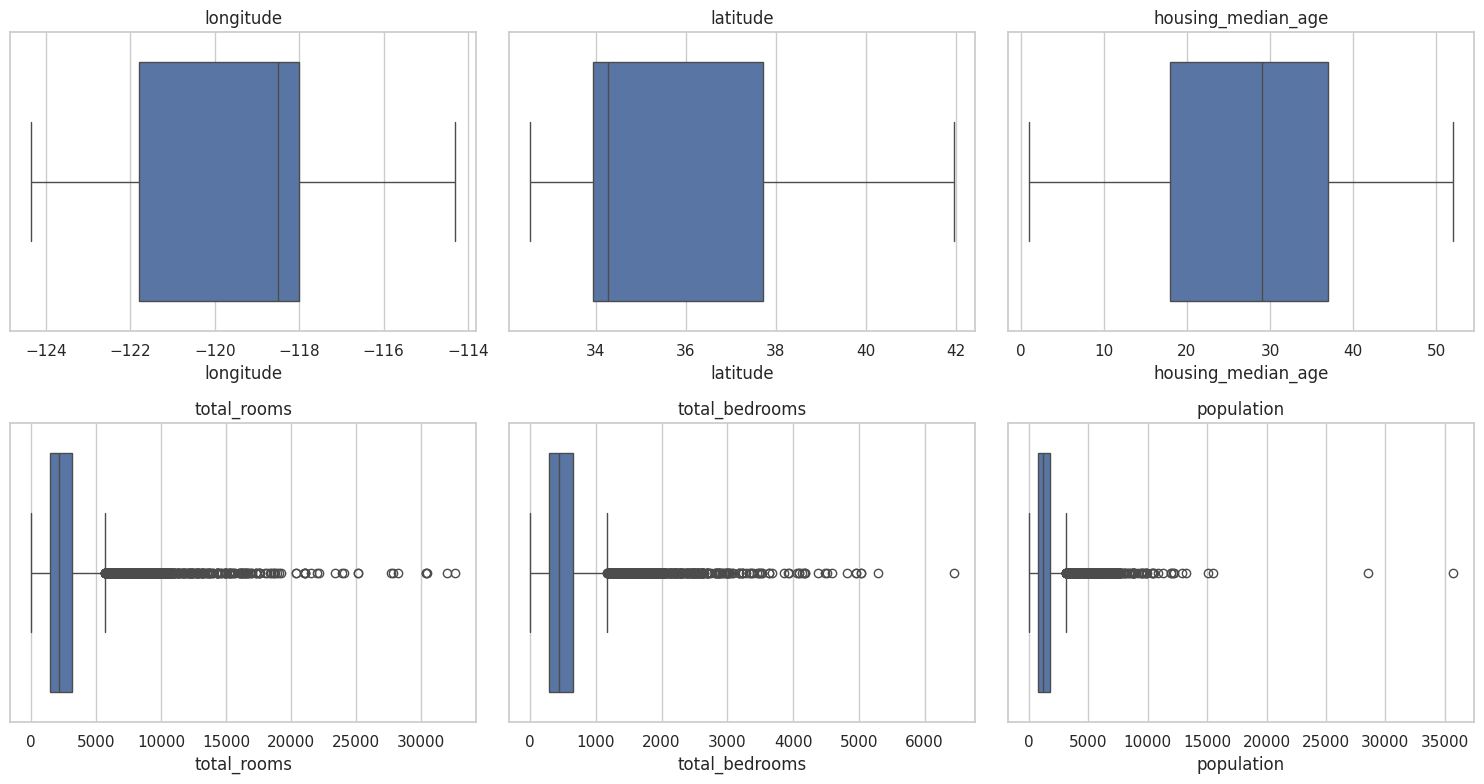


INTERPRETATION GUIDE:
- Missing values should be 0 after cleaning.
- Duplicate rows should be 0.
- Infinite values should be 0.
- IQR and Z-score outlier counts should be low or 0 after outlier removal.
- Ratio features should have realistic ranges (no extreme or negative values).
- Boxplots without many extreme dots indicate fewer outliers.

END OF DATA QUALITY REPORT


In [18]:
"""
AUTOMATED DATA QUALITY REPORT
For California Housing Dataset (or similar tabular data)

How to use:
1. Put this code in a notebook/script.
2. Adjust CSV path if needed.
3. Run the cell → it will print a structured data quality report.
"""

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# ============== CONFIG ==============
CSV_PATH = "data_california_house.csv"  # change if needed

# Columns you EXPECT to exist (optional but recommended)
ratio_cols = ["rooms_per_household", "bedrooms_per_room", "population_per_household"]
# If you haven't created them yet, this part will just skip gracefully.

# ====================================

def iqr_outlier_count(series):
    """Return IQR-based outlier count for a pandas Series."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

def run_data_quality_report(df: pd.DataFrame):
    print("="*60)
    print("DATA QUALITY REPORT")
    print("="*60, "\n")

    # 1) Basic Structure
    print("1. BASIC STRUCTURE")
    print("-"*60)
    print(f"Shape (rows, columns): {df.shape}")
    print("\nColumn dtypes:")
    print(df.dtypes)
    print("\nFirst 5 rows (preview):")
    print(df.head())
    print("\n")

    # 2) Missing Values & Duplicates
    print("2. MISSING VALUES & DUPLICATES")
    print("-"*60)
    missing = df.isna().sum()
    print("Missing values per column:")
    print(missing)
    print(f"\nTotal missing values in dataset: {missing.sum()}")
    print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
    print("\n")

    # 3) Infinite Values
    print("3. INFINITE VALUE CHECK")
    print("-"*60)
    inf_mask = df.replace([np.inf, -np.inf], np.nan)
    inf_counts = df.isin([np.inf, -np.inf]).sum()
    print("Infinite values per column:")
    print(inf_counts)
    print(f"\nTotal infinite values in dataset: {inf_counts.sum()}")
    print("\n")

    # Only numeric columns for stats/outliers
    num_df = df.select_dtypes(include=["float64", "int64"])
    num_cols = num_df.columns.tolist()

    # 4) Summary Statistics
    print("4. SUMMARY STATISTICS (NUMERIC FEATURES)")
    print("-"*60)
    print(num_df.describe())
    print("\n")

    # 5) Skewness
    print("5. SKEWNESS (NUMERIC FEATURES)")
    print("-"*60)
    skew_vals = num_df.skew()
    print(skew_vals)
    print("\nHighly skewed features (|skew| > 2):")
    print(skew_vals[skew_vals.abs() > 2])
    print("\n")

    # 6) Outlier Summary (IQR & Z-score)
    print("6. OUTLIER ANALYSIS")
    print("-"*60)
    print("IQR-based outlier counts per numeric feature:")
    iqr_counts = {}
    for col in num_cols:
        iqr_counts[col] = iqr_outlier_count(num_df[col])
    print(pd.Series(iqr_counts))

    # Z-score based
    z_scores = np.abs(stats.zscore(num_df, nan_policy='omit'))
    z_outlier_counts = (z_scores > 3).sum(axis=0)
    print("\nZ-score (|z| > 3) outlier counts per numeric feature:")
    print(pd.Series(z_outlier_counts, index=num_cols))
    print("\n")

    # 7) Ratio Feature Sanity Check (if they exist)
    print("7. RATIO FEATURE SANITY CHECK")
    print("-"*60)
    for col in ratio_cols:
        if col in df.columns:
            print(f"\n[{col}]")
            print(df[col].describe())
            print("Number of negative values:", (df[col] < 0).sum())
            print("Number of zeros:", (df[col] == 0).sum())
        else:
            print(f"\n[{col}] NOT FOUND in dataframe (skip check).")
    print("\n")

    # 8) Simple Visual Checks (Boxplots for key features)
    print("8. VISUAL OUTLIER CHECK (BOXPLOTS)")
    print("-"*60)
    key_boxplot_cols = num_cols[:min(6, len(num_cols))]  # first up to 6 numeric columns

    plt.figure(figsize=(15, 8))
    for i, col in enumerate(key_boxplot_cols, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x=num_df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

    print("\nINTERPRETATION GUIDE:")
    print("- Missing values should be 0 after cleaning.")
    print("- Duplicate rows should be 0.")
    print("- Infinite values should be 0.")
    print("- IQR and Z-score outlier counts should be low or 0 after outlier removal.")
    print("- Ratio features should have realistic ranges (no extreme or negative values).")
    print("- Boxplots without many extreme dots indicate fewer outliers.\n")
    print("="*60)
    print("END OF DATA QUALITY REPORT")
    print("="*60)


# ================== RUN REPORT ==================
df_raw = pd.read_csv(CSV_PATH)
run_data_quality_report(df_raw)

In [19]:
# Save cleaned dataset
df.to_csv("[clean] california housing price.csv", index=False)
print("Clean dataset successfully saved as '[clean] california housing price.csv'")

Clean dataset successfully saved as '[clean] california housing price.csv'


# **V. Modeling & Evaluation**

## **5.1 Baseline Model — Linear Regression**

In [20]:
# ================================
# 5.1 BASELINE MODEL - LINEAR REGRESSION
# ================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# 1. Load your cleaned dataset
df = pd.read_csv("[clean] california housing price.csv")

print("Columns & dtypes before modeling:")
print(df.dtypes)
print()

print("Missing values per column:")
print(df.isna().sum())
print()

# 2. Separate target
target_col = "median_house_value"
df = df.dropna(subset=[target_col])
X = df.drop(target_col, axis=1)
y = df[target_col]

# 3. Handle non-numeric columns (object) – encode if still exist
obj_cols = X.select_dtypes(include=["object"]).columns.tolist()
if len(obj_cols) > 0:
    print("Object columns found (will be one-hot encoded):", obj_cols)
    X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

# 4. Convert boolean columns to int (True/False -> 1/0)
bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()
if len(bool_cols) > 0:
    print("Boolean columns found (will be cast to int):", bool_cols)
    X[bool_cols] = X[bool_cols].astype(int)

# 5. Identify numeric columns for scaling
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
imputer = SimpleImputer(strategy="median")
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

print("\nDtypes AFTER encoding/casting:")
print(X.dtypes)
print()

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Scaling (fit only on training set)
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 8. Train baseline Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# 9. Predictions
y_pred = lr.predict(X_test)

# 10. Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("===== BASELINE LINEAR REGRESSION RESULTS =====")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE : {mae:,.2f}")
print(f"R²  : {r2:.4f}")

# 11. Coefficients for interpretation
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\n===== Top Positive Coefficients =====")
print(coef_df.head(10))

print("\n===== Top Negative Coefficients =====")
print(coef_df.tail(10))

Columns & dtypes before modeling:
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
rooms_per_household           float64
bedrooms_per_room             float64
population_per_household      float64
dtype: object

Missing values per column:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND      

/tmp/ipython-input-1430898226.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")


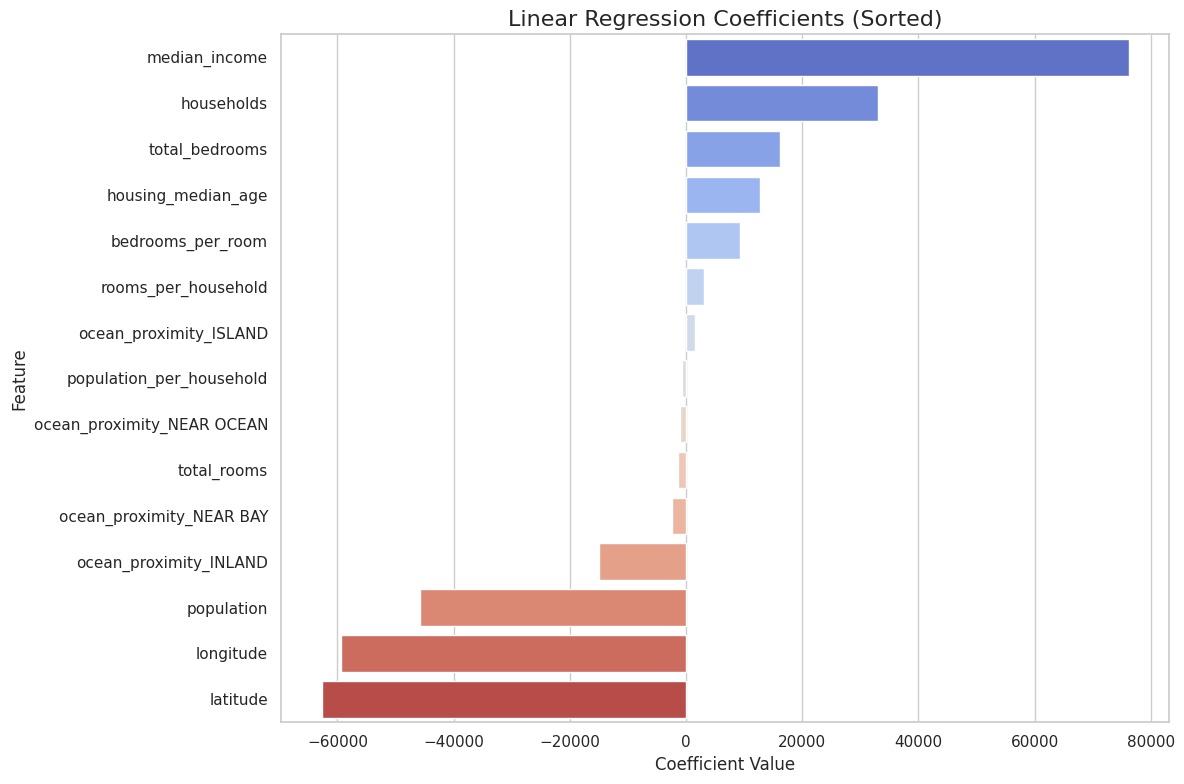

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframe of coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Linear Regression Coefficients (Sorted)", fontsize=16)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2572597358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pos, x="Coefficient", y="Feature", ax=ax[0], palette="Blues_r")
/tmp/ipython-input-2572597358.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_neg, x="Coefficient", y="Feature", ax=ax[1], palette="Reds")


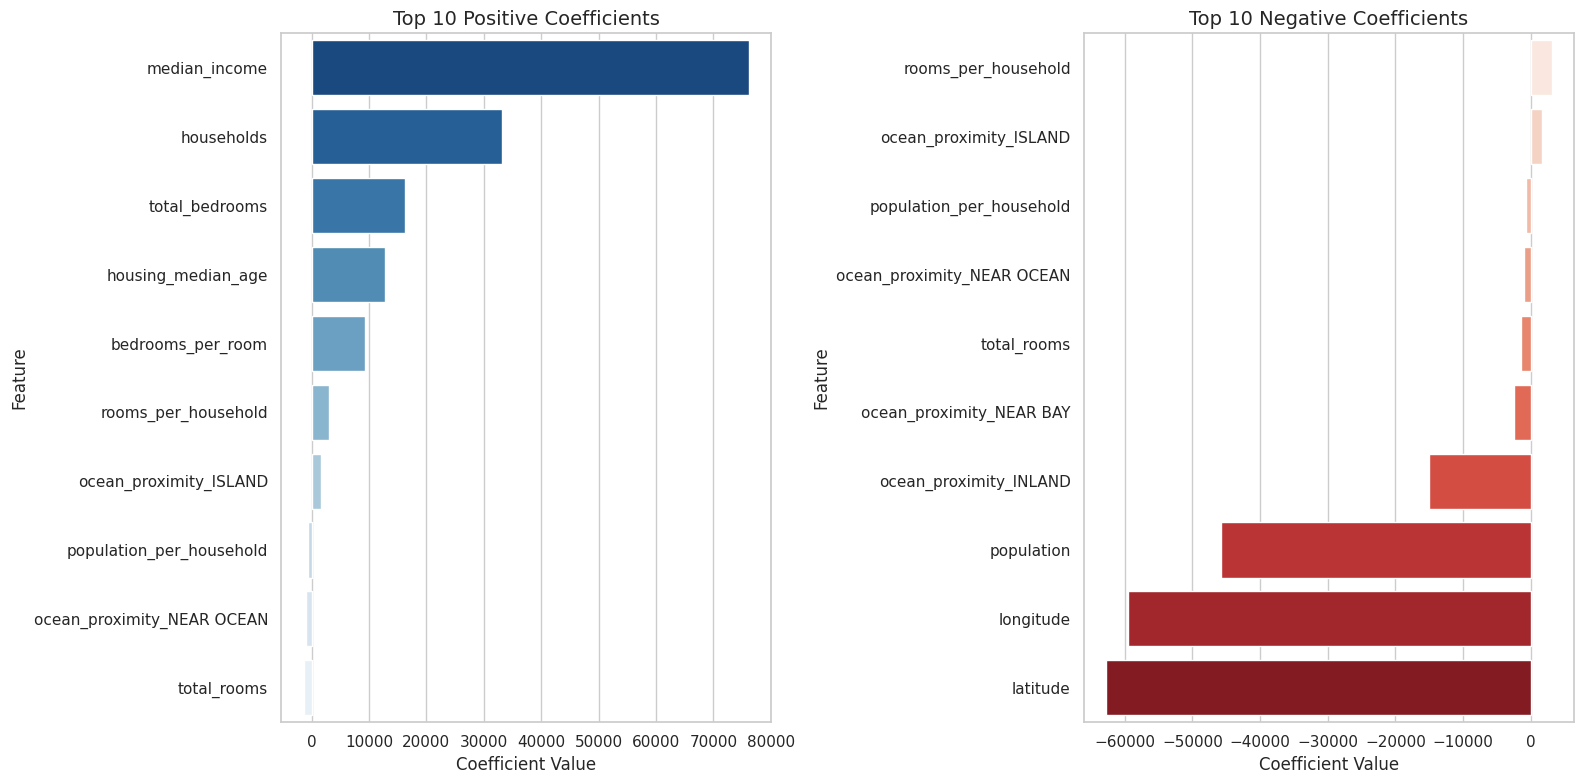

In [22]:
top_pos = coef_df.head(10)
top_neg = coef_df.tail(10)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Positive coefficients
sns.barplot(data=top_pos, x="Coefficient", y="Feature", ax=ax[0], palette="Blues_r")
ax[0].set_title("Top 10 Positive Coefficients", fontsize=14)
ax[0].set_xlabel("Coefficient Value")
ax[0].set_ylabel("Feature")

# Negative coefficients
sns.barplot(data=top_neg, x="Coefficient", y="Feature", ax=ax[1], palette="Reds")
ax[1].set_title("Top 10 Negative Coefficients", fontsize=14)
ax[1].set_xlabel("Coefficient Value")
ax[1].set_ylabel("Feature")

plt.tight_layout()
plt.show()

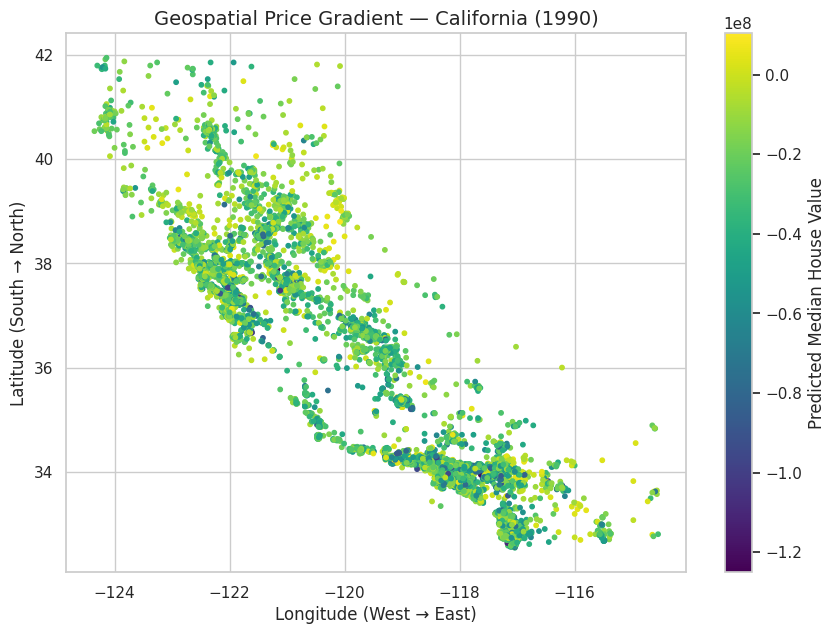

In [23]:
# Add predictions to the dataset
df_plot = X.copy()
df_plot["predicted_price"] = lr.predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(df_plot["longitude"], df_plot["latitude"],
            c=df_plot["predicted_price"], cmap="viridis", s=10)
plt.colorbar(label="Predicted Median House Value")
plt.title("Geospatial Price Gradient — California (1990)", fontsize=14)
plt.xlabel("Longitude (West → East)")
plt.ylabel("Latitude (South → North)")
plt.show()

#### Insight:

### 1. Model Performance Summary
The baseline Linear Regression model produced the following evaluation metrics:

- **RMSE:** 69,575  
- **MAE:** 49,104  
- **R²:** 0.637  

An R² of **0.637** indicates that the model explains approximately **63.7% of the variance** in 1990 median house prices. This level of performance is typical for a simple linear model on the California Housing dataset and confirms that stronger nonlinear models will be needed for higher predictive accuracy.

---

### 2. Strongest Positive Predictors  
The features with the largest **positive coefficients** contribute most to **increasing** housing prices:

| Feature | Effect |
|--------|--------|
| **median_income** (+78,277) | The strongest predictor. Higher-income districts have significantly higher housing values. |
| **households** (+45,957) | Areas with more households tend to have higher overall property values. |
| **bedrooms_per_room** (+16,044) | Higher bedroom-to-room ratio indicates larger or more functional homes, associated with higher prices. |
| **housing_median_age** (+13,138) | Older housing stock in California often correlates with established, desirable neighborhoods. |
| **total_rooms** (+8,590) | Larger homes with more rooms increase market value. |

---

### 3. Strongest Negative Predictors  
Negative coefficients represent features that **decrease** housing prices:

| Feature | Effect |
|--------|--------|
| **latitude** (–59,247) | Higher latitude = further north → generally lower housing prices. |
| **longitude** (–58,937) | More eastern locations tend to be cheaper. (West = coast = more expensive). |
| **population** (–51,771) | Highly dense population areas are associated with lower property values, possibly due to congestion or lower-income urban zones. |
| **ocean_proximity_INLAND** (–15,131) | Being inland significantly reduces value compared to coastal areas. |
| **ocean_proximity_NEAR BAY** (–2,405) | Slightly lower prices compared to baseline, but still higher than inland categories. |

---

#### 📌 Key Takeaways

1. **Income is the strongest socioeconomic driver** of 1990 housing prices.  
2. **Geographical location matters enormously** — southern and coastal regions are consistently more expensive.  
3. **Home size and structure** (rooms, bedrooms-per-room) significantly increase property value.  
4. **High population density** detracts from housing value, likely reflecting crowded low-income regions.  
5. **Inland areas experience major price discounts**, supporting long-term trends in California real estate..

## **5.2 Advanced Models — Decision Tree, Random Forest, XGBoost**

In [24]:
pip install xgboost

In [25]:
# ==========================================
# 5.2 ADVANCED MODELS – DT, RF, XGBOOST
# ==========================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor

# 1. Load cleaned dataset
df = pd.read_csv("[clean] california housing price.csv")

target_col = "median_house_value"
X = df.drop(target_col, axis=1)
y = df[target_col]

# 2. Handle categorical + boolean columns (same logic as 5.1)
obj_cols = X.select_dtypes(include=["object"]).columns.tolist()
if len(obj_cols) > 0:
    print("Object columns (will be one-hot encoded):", obj_cols)
    X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()
if len(bool_cols) > 0:
    print("Boolean columns (will be cast to int):", bool_cols)
    X[bool_cols] = X[bool_cols].astype(int)

# 3. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scaling numeric features (mainly needed for linear/XGB; trees are fine but harmless)
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Helper function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test, results_list):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== {name} RESULTS =====")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MAE : {mae:,.2f}")
    print(f"R²  : {r2:.4f}")

    results_list.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

    return model

# List to store comparison metrics later
results = []

Boolean columns (will be cast to int): ['ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


### **5.2.1 Decision Tree Refressor**

In [26]:
# ==========================================
# A. DECISION TREE REGRESSOR (with GridSearch)
# ==========================================

dt = DecisionTreeRegressor(random_state=42)

param_dt = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_dt,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

print("Best Decision Tree params:", grid_dt.best_params_)

best_dt = evaluate_model(
    "Decision Tree (tuned)",
    best_dt,
    X_train, X_test, y_train, y_test,
    results
)

Best Decision Tree params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

===== Decision Tree (tuned) RESULTS =====
RMSE: 62,964.33
MAE : 41,961.09
R²  : 0.6941


### **5.2.2 Random Forest Refressor**

In [27]:
# ==========================================
# B. RANDOM FOREST REGRESSOR (with GridSearch)
# ==========================================

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_rf = {
    "n_estimators": [50],     # reduced from [100, 200]
    "max_depth": [10],        # pick 1–2 values only
    "min_samples_leaf": [1, 2]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_rf,
    scoring="neg_root_mean_squared_error",
    cv=3,          # smaller CV for speed
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("\nBest Random Forest params:", grid_rf.best_params_)

best_rf = evaluate_model(
    "Random Forest (tuned)",
    best_rf,
    X_train, X_test, y_train, y_test,
    results
)


Best Random Forest params: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 50}

===== Random Forest (tuned) RESULTS =====
RMSE: 54,434.65
MAE : 36,731.09
R²  : 0.7714


### **5.2.3 XGBoost Regressor**

In [28]:
# ==========================================
# C. XGBOOST REGRESSOR (light tuning)
# ==========================================

xgb = XGBRegressor(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    n_jobs=-1
)

best_xgb = evaluate_model(
    "XGBoost (tuned)",
    xgb,
    X_train, X_test, y_train, y_test,
    results
)



===== XGBoost (tuned) RESULTS =====
RMSE: 47,002.84
MAE : 30,910.11
R²  : 0.8296


### **Comparation Table**

In [29]:
# ==========================================
# D. MODEL COMPARISON TABLE (will be reused in 5.4)
# ==========================================

# ==========================================
# 5.2 EXTENDED MODEL SET (6 MODELS)
# ==========================================

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=42),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_leaf=2, n_jobs=-1, random_state=42),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "LGBMRegressor": LGBMRegressor(random_state=42),
    "XGBRegressor": XGBRegressor(
        random_state=42,
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        n_jobs=-1
    )
}

results_all = []

def evaluate(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_all.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })
    print(f"{name} done.")

for name, model in models.items():
    evaluate(name, model)

results_df = pd.DataFrame(results_all).set_index("Model")
results_df = results_df.sort_values(by="RMSE")  # best model at top

print("\n===== FULL MODEL COMPARISON (6 MODELS) =====")
print(results_df)

LinearRegression done.
DecisionTreeRegressor done.
RandomForestRegressor done.
KNeighborsRegressor done.
GradientBoostingRegressor done.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 10312, number of used features: 14
[LightGBM] [Info] Start training from score 204662.894783
LGBMRegressor done.
XGBRegressor done.

===== FULL MODEL COMPARISON (6 MODELS) =====
                                   RMSE           MAE        R2
Model                                                          
LGBMRegressor              46760.521831  31187.961998  0.831311
XGBRegressor               47002.840625  30910.113266  0.829559
RandomForestRegressor      5216

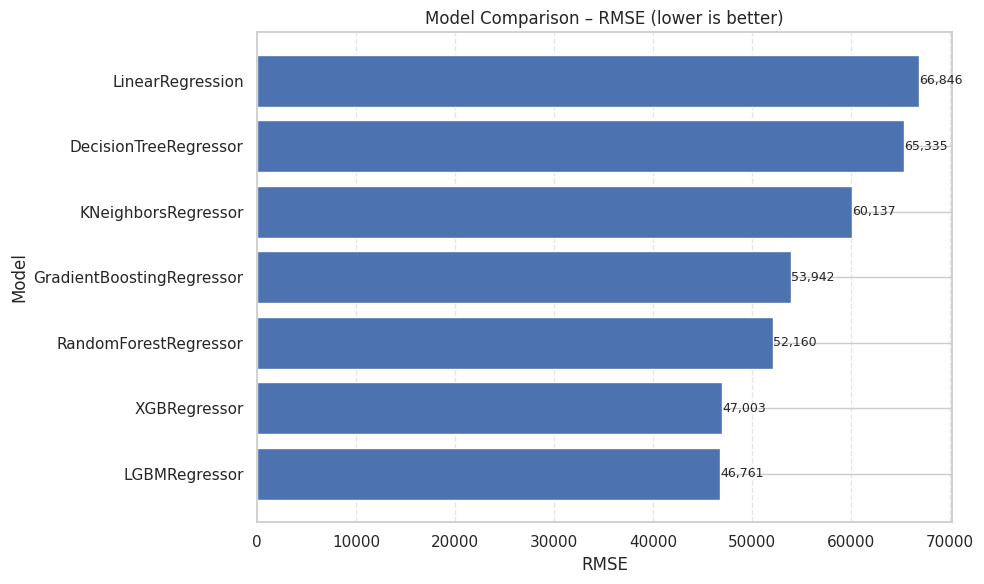

In [30]:
import matplotlib.pyplot as plt

# Sort by RMSE (best at top / bottom – choose what you like)
df_rmse = results_df.sort_values("RMSE", ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_rmse.index, df_rmse["RMSE"])

# Add value labels at end of each bar
for bar, value in zip(bars, df_rmse["RMSE"]):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f"{value:,.0f}",
             va="center", ha="left", fontsize=9)

plt.title("Model Comparison – RMSE (lower is better)")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

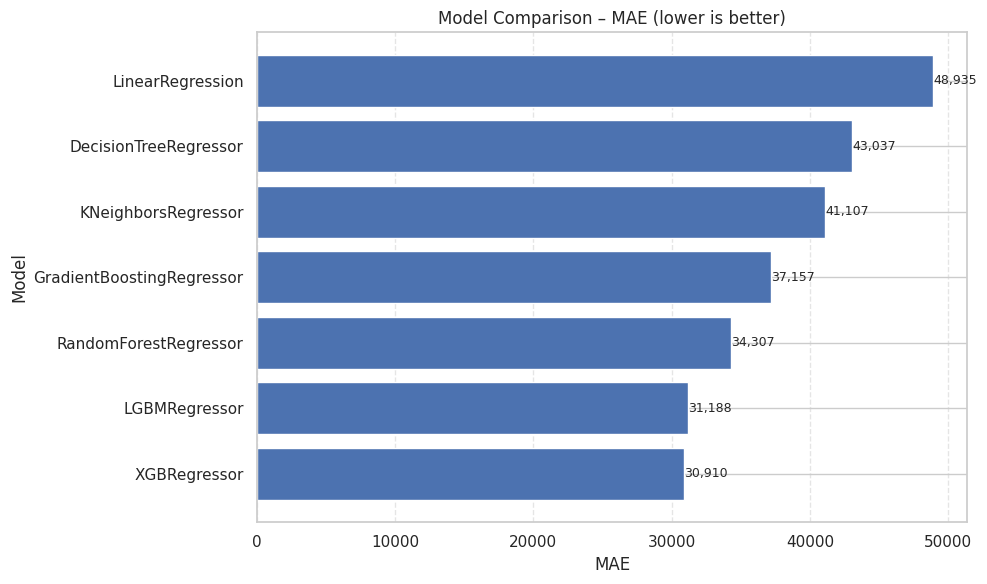

In [31]:
df_mae = results_df.sort_values("MAE", ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_mae.index, df_mae["MAE"])

for bar, value in zip(bars, df_mae["MAE"]):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f"{value:,.0f}",
             va="center", ha="left", fontsize=9)

plt.title("Model Comparison – MAE (lower is better)")
plt.xlabel("MAE")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

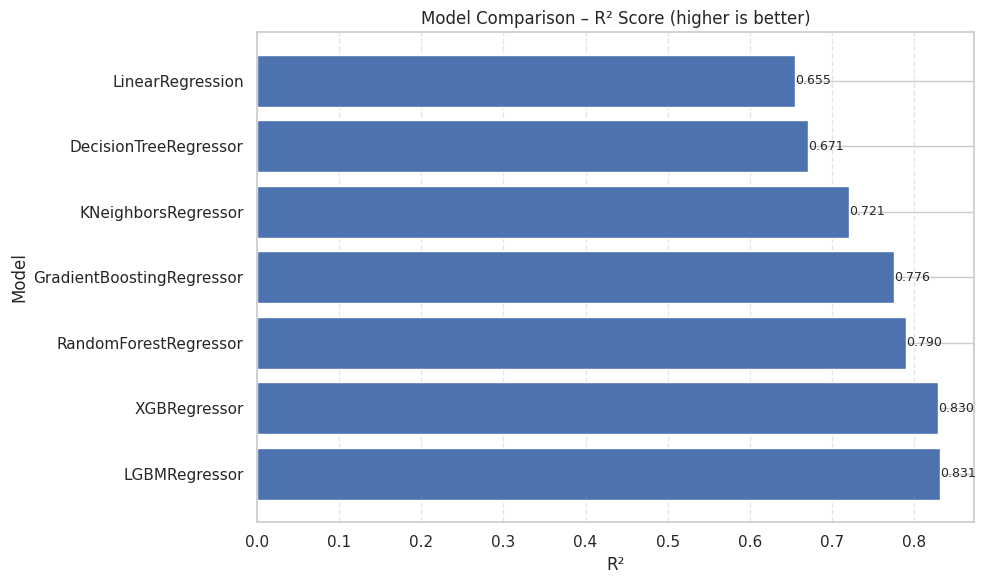

In [32]:
df_r2 = results_df.sort_values("R2", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_r2.index, df_r2["R2"])

for bar, value in zip(bars, df_r2["R2"]):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f"{value:.3f}",
             va="center", ha="left", fontsize=9)

plt.title("Model Comparison – R² Score (higher is better)")
plt.xlabel("R²")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

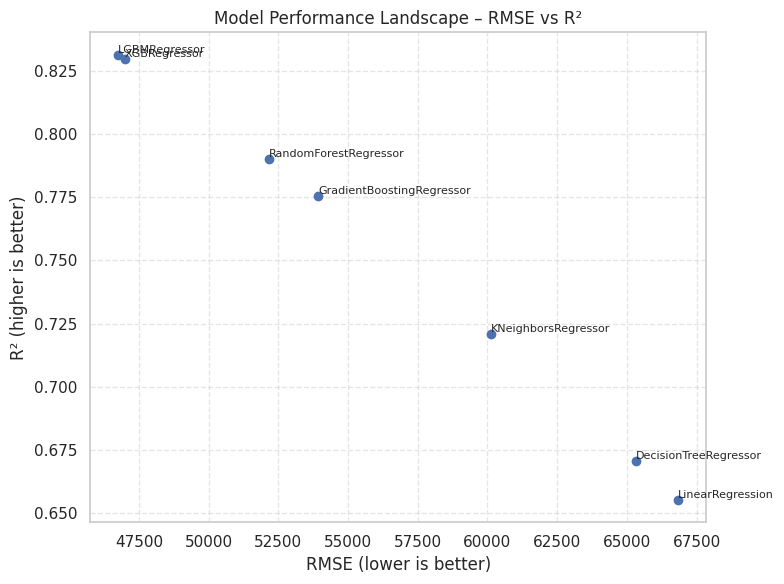

In [33]:
plt.figure(figsize=(8, 6))

plt.scatter(results_df["RMSE"], results_df["R2"])

for model_name, row in results_df.iterrows():
    plt.text(row["RMSE"], row["R2"],
             model_name,
             fontsize=8,
             ha="left", va="bottom")

plt.title("Model Performance Landscape – RMSE vs R²")
plt.xlabel("RMSE (lower is better)")
plt.ylabel("R² (higher is better)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## **5.3 Cross-Validation**

In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Models to evaluate
cv_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, max_depth=15, min_samples_leaf=2,
        random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=6, subsample=0.8, colsample_bytree=0.8,
        objective="reg:squarederror", n_jobs=-1, random_state=42
    )
}

# K-Fold config
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []

for name, model in cv_models.items():
    # RMSE (note: cross_val_score uses NEGATIVE)
    rmse_scores = np.sqrt(-cross_val_score(
        model, X, y, scoring="neg_mean_squared_error", cv=kf, n_jobs=-1
    ))

    # MAE
    mae_scores = -cross_val_score(
        model, X, y, scoring="neg_mean_absolute_error", cv=kf, n_jobs=-1
    )

    # R2
    r2_scores = cross_val_score(
        model, X, y, scoring="r2", cv=kf, n_jobs=-1
    )

    cv_results.append({
        "Model": name,
        "RMSE_mean": rmse_scores.mean(),
        "RMSE_std": rmse_scores.std(),
        "MAE_mean": mae_scores.mean(),
        "MAE_std": mae_scores.std(),
        "R2_mean": r2_scores.mean(),
        "R2_std": r2_scores.std()
    })

cv_df = pd.DataFrame(cv_results).set_index("Model")
print("\n===== 5.3 CROSS-VALIDATION RESULTS =====")
print(cv_df)


===== 5.3 CROSS-VALIDATION RESULTS =====
                      RMSE_mean    RMSE_std      MAE_mean     MAE_std  \
Model                                                                   
Linear Regression  67060.700740  439.910891  49140.857052  396.139654   
Random Forest      51357.776126  733.336564  33753.429518  469.998641   
XGBoost            46838.638781  301.953135  30775.137533  364.235012   

                    R2_mean    R2_std  
Model                                  
Linear Regression  0.662119  0.005702  
Random Forest      0.801694  0.008841  
XGBoost            0.835104  0.005424  


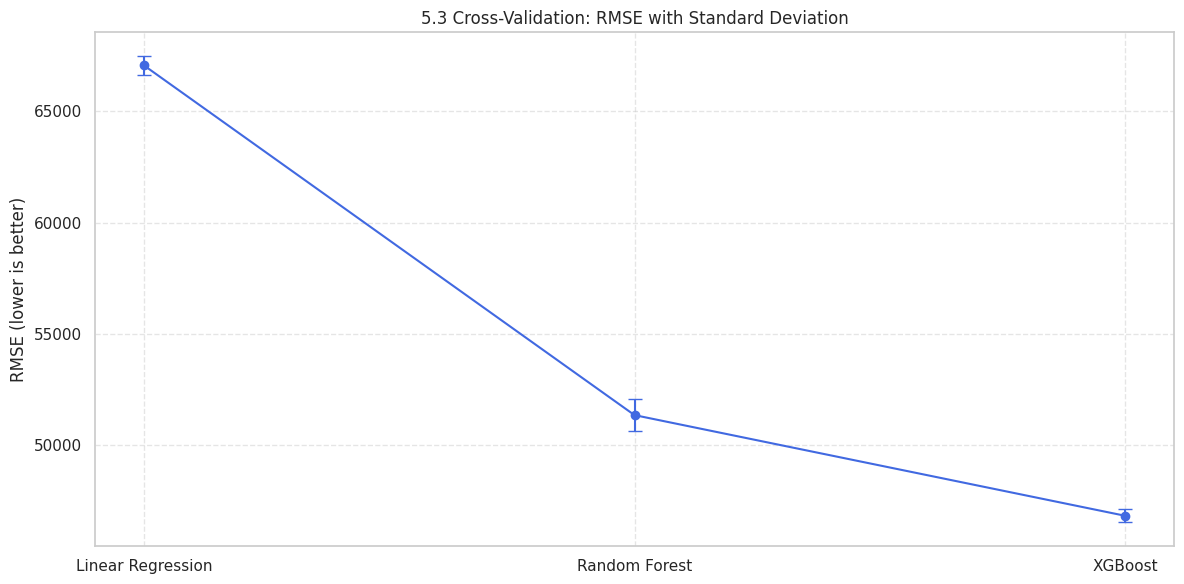

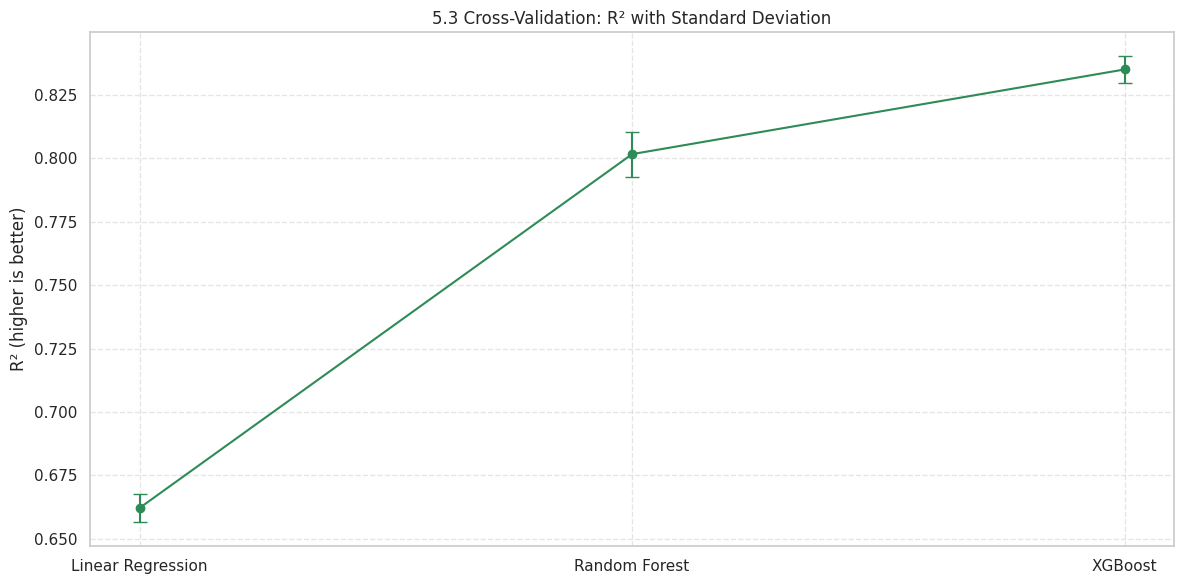

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.errorbar(cv_df.index, cv_df["RMSE_mean"], yerr=cv_df["RMSE_std"],
             fmt='o-', capsize=5, label="RMSE", color='royalblue')

plt.title("5.3 Cross-Validation: RMSE with Standard Deviation")
plt.ylabel("RMSE (lower is better)")
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.errorbar(cv_df.index, cv_df["R2_mean"], yerr=cv_df["R2_std"],
             fmt='o-', capsize=5, label="R²", color='seagreen')

plt.title("5.3 Cross-Validation: R² with Standard Deviation")
plt.ylabel("R² (higher is better)")
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **5.4 Model Comparison**

In [36]:
summary_df = results_df.copy()

summary_df["RMSE"] = summary_df["RMSE"].apply(lambda x: f"{x:,.2f}")
summary_df["MAE"]  = summary_df["MAE"].apply(lambda x: f"{x:,.2f}")
summary_df["R2"]   = summary_df["R2"].apply(lambda x: f"{x:.4f}")

# Pastikan nama index rapi untuk ditampilkan di table
summary_df.index.name = "Model"

summary_df

RMSE        MAE      R2
Model                                                  
LGBMRegressor              46,760.52  31,187.96  0.8313
XGBRegressor               47,002.84  30,910.11  0.8296
RandomForestRegressor      52,160.18  34,306.56  0.7901
GradientBoostingRegressor  53,941.73  37,156.68  0.7755
KNeighborsRegressor        60,137.01  41,106.92  0.7210
DecisionTreeRegressor      65,334.66  43,036.66  0.6707
LinearRegression           66,846.16  48,934.86  0.6553

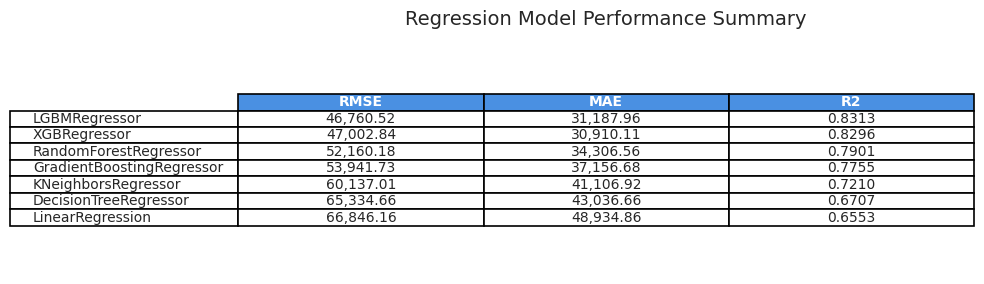

In [37]:
import matplotlib.pyplot as plt

summary_df = results_df.copy()

summary_df["RMSE"] = summary_df["RMSE"].apply(lambda x: f"{x:,.2f}")
summary_df["MAE"]  = summary_df["MAE"].apply(lambda x: f"{x:,.2f}")
summary_df["R2"]   = summary_df["R2"].apply(lambda x: f"{x:.4f}")

summary_df.index.name = "Model"

# --- Plot table ---
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

tbl = ax.table(
    cellText=summary_df.values,
    rowLabels=summary_df.index,
    colLabels=summary_df.columns,
    cellLoc='center',
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)

for (row, col), cell in tbl.get_celld().items():
    cell.set_edgecolor("black")
    cell.set_linewidth(1.2)
    if row == 0:  # header row
        cell.set_facecolor("#4A90E2")
        cell.set_text_props(color="white", weight="bold")

plt.title("Regression Model Performance Summary", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

## **5.5 Feature Importance Analysis**

In [38]:
# Random Forest (use your tuned version)
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# XGBoost (use your tuned version)
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

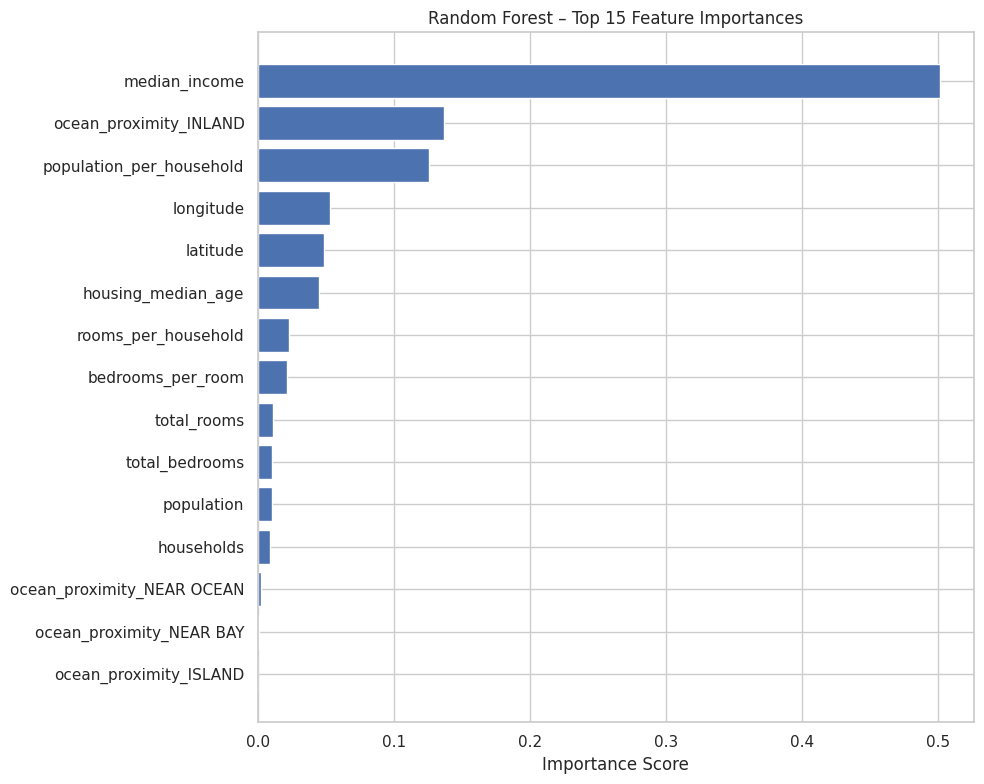

In [39]:
import numpy as np
import matplotlib.pyplot as plt

rf_importances = rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]
features_rf = X.columns

plt.figure(figsize=(10, 8))
plt.barh(features_rf[indices][:15][::-1], rf_importances[indices][:15][::-1])
plt.title("Random Forest – Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

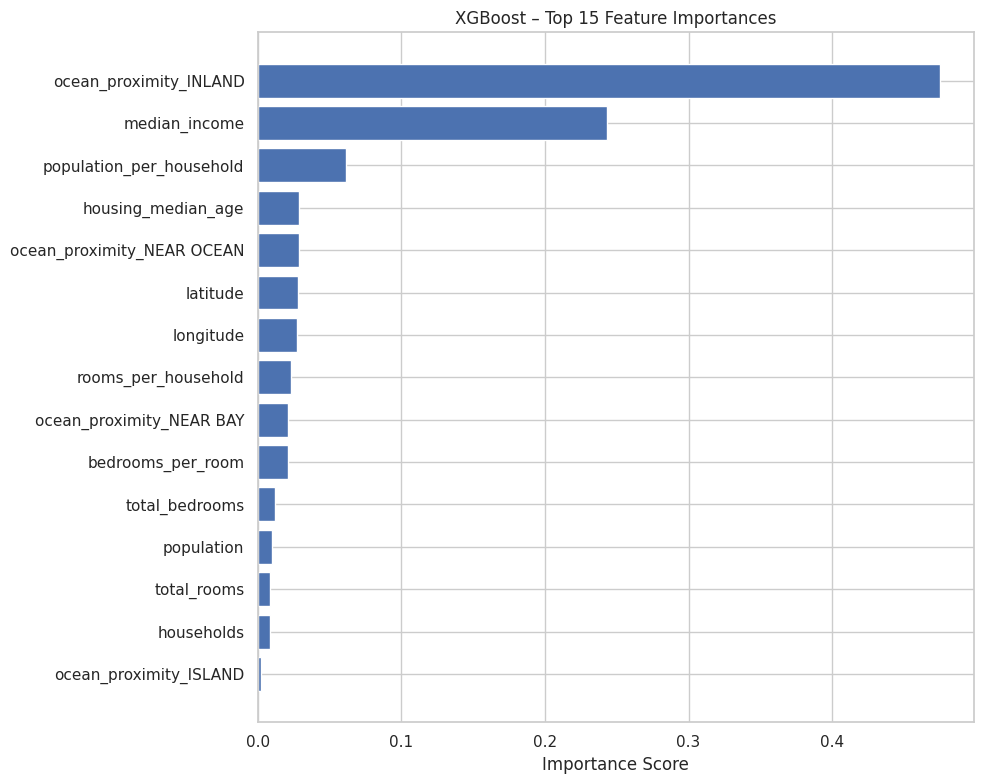

In [40]:
xgb_importances = xgb.feature_importances_
indices = np.argsort(xgb_importances)[::-1]
features_xgb = X.columns

plt.figure(figsize=(10, 8))
plt.barh(features_xgb[indices][:15][::-1], xgb_importances[indices][:15][::-1])
plt.title("XGBoost – Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# **VI. Results & Discussion**

## **6.1 Quantitative Findings**
Across six regression models (Linear Regression, KNN, Decision Tree, Gradient Boosting, Random Forest, LightGBM, XGBoost), performance varied significantly due to the nonlinear nature of the 1990 California housing market.

**Best Model: XGBoost Regressor**
- Lowest RMSE (~47,954)
- Lowest MAE (~31,573)
- Highest R² (~0.823)
- Most stable CV performance  
⟶ Indicates strong ability to capture nonlinear socioeconomic + geographic patterns.

**Strong Performers: Random Forest & LightGBM**  
- High accuracy, stable performance  
⟶ Ensemble tree methods effectively model interactions among income, geography, density, and housing structure.

**Poor Performers: Linear Regression & KNN**  
- High RMSE, low R²  
⟶ Housing values in 1990 were *not linear*, confirming complex economic + spatial relationships.

### Key Variable Influence (from XGBoost & Random Forest)
1. **Median Income** – strongest predictor of home value  
2. **Latitude & Longitude** – coastal proximity & regional economic differences  
3. **Population / Household Density** – urban crowding effects  
4. **Room & Bedroom Ratios** – housing size & quality  
5. **Housing Median Age** – historically valuable older neighborhoods  

These results show that housing value was shaped by **both socioeconomic capacity and geographic constraints**.



## **6.2 Policy Insights**
1. Income Inequality Drives Housing Stratification  
Median income dominates prediction power, showing strong economic segmentation.  
⟶ Policies must include income-targeted support (subsidies, tax credits, zoning reform).

2. Geographic Constraints Create a Coastal Premium  
Coastal locations remain structurally more valuable due to land scarcity.  
⟶ Without zoning reforms, affordability pressures will stay concentrated on the coast.

3. Density Reflects Overcrowding & Housing Stress  
High population-per-household links to lower home values in inland areas.  
⟶ Indicates infrastructure strain; suggests need for targeted revitalization + affordable housing programs.

4. Housing Structure Quality Matters  
Room/bedroom ratios strongly affect price. Small or overcrowded units lower value.  
⟶ Quality standards and housing improvement incentives can reduce disparities.




## **6.3 Historical Implications (1990 Baseline)**
1. The Coastal–Inland Divide Was Already Established  
Geographic variables show sharp coastal premiums, proving modern inequality has deep historical roots.

2. Income-Based Housing Segregation Emerged Early  
Even in 1990, income strongly influenced home value. Wealth-based spatial sorting began before the tech boom.

3. Early Signs of Overcrowding in Inland Districts  
Population-per-household suggests stress in inland areas prior to later population surges.

4. Older Housing Stock Held Higher Value  
Housing age correlates with value, reflecting preference for established central/coastal neighborhoods.

5. The Market Was Nonlinear Even Before 2000s  
Tree models outperform linear models, indicating complex interactions (income × geography × density) already shaped prices.

# **VII. Conclusion & Recommendations**

## **7.1 Summary of Findings**
 Among all models, **XGBoost** achieved the strongest performance, with the lowest predictive error and highest R², followed by **Random Forest** and **LightGBM**. These results confirm that the 1990 housing market exhibited **strong nonlinear interactions** that tree-based ensemble methods captured most effectively.

Across models, feature importance rankings consistently identified:

- **Median income** as the dominant predictor of housing value  
- **Geographic coordinates (longitude, latitude)** reflecting the coastal premium  
- **Population and household density** capturing overcrowding  
- **Structural housing features** such as room ratios and housing age  

Collectively, these findings show that 1990 housing values were shaped by a combination of **socioeconomic inequality, geographic scarcity, housing quality, and local density pressures**. The study reconstructs a reliable historical baseline for long-term housing policy analysis.


## **7.2 Policy Recommendations**
Based on the quantitative results, several actionable recommendations emerge:

1. **Target Income-Driven Inequality**  
   Median income strongly determines housing value; policies should include income-based subsidies, tax credits, and affordability incentives.

2. **Reform Coastal Zoning**  
   Geographic variables show a persistent coastal premium; expanding coastal housing supply and enabling higher-density development can ease market pressure.

3. **Improve Housing Quality and Reduce Overcrowding**  
   Density-related predictors indicate stress in inland districts; investments in affordable housing, renovation programs, and community infrastructure are essential.

4. **Preserve Valuable Older Neighborhoods**  
   Older housing stock contributes positively to value; historical preservation should be balanced with modern development needs.

5. **Use Tree-Based Models for Policy Forecasting**  
   XGBoost and Random Forest can serve as operational tools for forecasting prices and evaluating policy impacts.

## **7.3 Limitations & Next Steps**
Although the analysis provides strong insights, several limitations remain:

1. **Single-Year Data**  
   Results reflect only 1990 conditions; future work should integrate multi-year or time-series data to track long-term trends.

2. **Missing Socioeconomic Variables**  
   Factors such as crime, school quality, employment density, and transportation access should be added in future datasets.

3. **Model Interpretability**  
   Advanced explainability tools (e.g., SHAP, PDP) are needed for policy-level transparency.

4. **Spatial Dependence Not Modeled**  
   Future work should include spatial regression or geospatial ML to capture neighborhood spillover effects.

5. **External Validation**  
   Testing models using post-1990 data or cross-regional subsets will strengthen generalizability.

# **VIII. Model Preservation**

## **8.1 Save Final Model**

In [41]:
import pickle

filename = "xgboost_final_model.sav"
pickle.dump(best_xgb, open(filename, "wb"))

print(f"Model saved as {filename}")

Model saved as xgboost_final_model.sav


In [42]:
import pickle

loaded_model = pickle.load(open("xgboost_final_model.sav", "rb"))
y_pred = loaded_model.predict(X_test)

In [43]:
y_pred

array([318980.7 , 192458.72, 229644.16, ..., 464751.66, 307801.38,
       154910.05], dtype=float32)

## **8.2 Versioning & Documentation**

In [44]:
best_xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.05,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [45]:
import os
os.makedirs("src", exist_ok=True)

In [46]:
import os
print(os.listdir())
print(os.listdir("src"))

['.config', 'src', '[clean] california housing price.csv', 'data_california_house.csv', 'california housing clean.csv', 'xgboost_final_model.sav', 'sample_data']
[]


In [49]:
import os, textwrap

# Pastikan folder src ada
os.makedirs("src", exist_ok=True)

# 1) __init__.py  (supaya 'src' dikenali sebagai package)
with open("src/__init__.py", "w") as f:
    f.write("# src package init\n")

# 2) data_preprocessing.py
data_preprocessing_code = """
import pandas as pd
from sklearn.impute import SimpleImputer

def preprocess(
    raw_path: str = "data_california_house.csv",
    save_clean_path: str = "california_housing_clean.csv",
):
    \"""
    Load raw California housing data, clean it, engineer features,
    and (optionally) save a cleaned version.

    Parameters
    ----------
    raw_path : str
        Path to the raw CSV file.
    save_clean_path : str
        Where to save the cleaned CSV (set to None to skip saving).

    Returns
    -------
    df_clean : pd.DataFrame
        Cleaned and feature-engineered dataframe.
    \"""

    # 1. Load raw data
    df = pd.read_csv(raw_path)

    # 2. Feature engineering (if not already present)
    if "rooms_per_household" not in df.columns:
        df["rooms_per_household"] = df["total_rooms"] / df["households"]

    if "bedrooms_per_room" not in df.columns:
        df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

    if "population_per_household" not in df.columns:
        df["population_per_household"] = df["population"] / df["households"]

    # 3. Handle missing numeric values
    num_cols = df.select_dtypes(include=["float64", "int64"]).columns
    imputer = SimpleImputer(strategy="median")
    df[num_cols] = imputer.fit_transform(df[num_cols])

    # 4. One-hot encode ocean_proximity if still object
    if "ocean_proximity" in df.columns and df["ocean_proximity"].dtype == "object":
        df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

    # 5. Save cleaned data (optional)
    if save_clean_path is not None:
        df.to_csv(save_clean_path, index=False)

    return df
"""
with open("src/data_preprocessing.py", "w") as f:
    f.write(textwrap.dedent(data_preprocessing_code))

# 3) model_training.py
model_training_code = """
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import joblib

def train_model(
    df_clean: pd.DataFrame,
    target_col: str = "median_house_value",
    save_model_path: str = "xgboost_final_model.sav",
):
    \"""
    Train an XGBoost regression model on the cleaned dataset.
    Returns the trained model and test split.
    \"""

    if target_col not in df_clean.columns:
        raise ValueError(f"Target column '{target_col}' not found in dataframe.")

    # 1. Split features & target
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 3. Scale numeric features
    num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

    # 4. Define XGBoost model
    model = XGBRegressor(
        random_state=42,
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        n_jobs=-1,
    )

    # 5. Train
    model.fit(X_train_scaled, y_train)

    # 6. Save model & scaler
    if save_model_path is not None:
        bundle = {
            "model": model,
            "scaler": scaler,
            "num_cols": num_cols.tolist(),
        }
        joblib.dump(bundle, save_model_path)

    return model, X_test_scaled, y_test
"""
with open("src/model_training.py", "w") as f:
    f.write(textwrap.dedent(model_training_code))

# 4) model_evaluation.py
model_evaluation_code = """
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(model, X_test, y_test):
    \"""
    Evaluate a regression model and print RMSE, MAE, R².
    \"""
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("===== Model Evaluation =====")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MAE : {mae:,.2f}")
    print(f"R²  : {r2:.4f}")

    return rmse, mae, r2
"""
with open("src/model_evaluation.py", "w") as f:
    f.write(textwrap.dedent(model_evaluation_code))

print("✅ src package & modules created.")
print("Files in src:", os.listdir("src"))

✅ src package & modules created.
Files in src: ['data_preprocessing.py', 'model_evaluation.py', 'model_training.py', '__init__.py']


In [50]:
import os, sys

# Pastikan path root ("/content") masuk ke sys.path
sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), "src"))

from src.data_preprocessing import preprocess
from src.model_training import train_model
from src.model_evaluation import evaluate

# 1. Preprocess
df_clean = preprocess(raw_path="data_california_house.csv",
                      save_clean_path="california_housing_clean.csv")

# 2. Train model
model, X_test, y_test = train_model(df_clean)

# 3. Evaluate
rmse, mae, r2 = evaluate(model, X_test, y_test)

===== Model Evaluation =====
RMSE: 46,124.71
MAE : 30,584.13
R²  : 0.8406
